# Lecture 1: Introduction to Large Language Models (LLMs)
## CSC5991 — Introduction to LLMs
### Companion Notebook (30 Slides)

**Student Notes by:** Anik Tahabilder | **Email:** tahabilderanik@gmail.com

---

**What this notebook covers:**

| Section | Topic | Slides |
|---------|-------|--------|
| Part 1 | Background — ML vs DL | 1-4 |
| Part 2 | Transfer Learning & Key Models | 5-8 |
| Part 3 | Understanding LLMs | 9-12 |
| Part 4 | History & Architecture Evolution | 13-18 |
| Part 5 | Training Paradigms | 19-22 |
| Part 6 | Prompt Engineering & In-Context Learning | 23-24 |
| Part 7 | Challenges & Future | 25-27 |
| Part 8 | Course Projects & Wrap-up | 28-30 |

> **Prerequisites:** Basic Python. That is it — every machine-learning concept
> is explained from scratch.
>
> **Dependencies:** Only `numpy` and `matplotlib`. No PyTorch or TensorFlow required.

---
# Part 0 — Environment Setup

Before we write any code we need to import our two libraries.

| Library | What it does (plain English) |
|---------|-----------------------------|
| `numpy` | Fast number-crunching on arrays (tables of numbers). All ML math happens on arrays. |
| `matplotlib` | Plotting library — we use it for graphs, diagrams, and heatmaps. |

In [1]:
# ============================================================
# 0.  Imports
# ============================================================
import numpy as np                 # Numerical arrays
import matplotlib.pyplot as plt    # Plotting / visualization
import matplotlib.patches as patches  # For drawing shapes on plots
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import matplotlib.patheffects as pe

# Nicer plots inside the notebook
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (10, 6)

# Reproducibility — same random numbers every time
np.random.seed(42)

# Directory for saving figures
SAVE_DIR = '/home/anik/code/CSC5991/lecture_1/'

print("All imports succeeded!")
print(f"NumPy version      : {np.__version__}")
print(f"Matplotlib imported : yes")
print()
print("We will use ONLY numpy and matplotlib in this notebook.")
print("Every ML operation is implemented from scratch for learning purposes.")

All imports succeeded!
NumPy version      : 2.4.2
Matplotlib imported : yes

We will use ONLY numpy and matplotlib in this notebook.
Every ML operation is implemented from scratch for learning purposes.


---
# Part 1 — Background (Slides 1-4)

## 1.1 What is Machine Learning? What is Deep Learning? (Slide 2)

**Machine Learning (ML)** is a branch of artificial intelligence where computers
learn patterns from data instead of being explicitly programmed.

**Deep Learning (DL)** is a *subset* of ML that uses **neural networks with many
layers** (hence "deep") to automatically learn features from raw data.

```
 ┌─────────────────────────────────────────────────┐
 │           Artificial Intelligence (AI)           │
 │                                                  │
 │   ┌──────────────────────────────────────────┐   │
 │   │        Machine Learning (ML)             │   │
 │   │                                          │   │
 │   │   ┌──────────────────────────────────┐   │   │
 │   │   │      Deep Learning (DL)          │   │   │
 │   │   │                                  │   │   │
 │   │   │   ┌──────────────────────────┐   │   │   │
 │   │   │   │  Large Language Models   │   │   │   │
 │   │   │   │       (LLMs)            │   │   │   │
 │   │   │   └──────────────────────────┘   │   │   │
 │   │   └──────────────────────────────────┘   │   │
 │   └──────────────────────────────────────────┘   │
 └─────────────────────────────────────────────────┘
```

### ML vs DL — Side-by-Side Comparison

| Feature | Machine Learning (ML) | Deep Learning (DL) |
|---------|----------------------|-------------------|
| **Definition** | Algorithms that learn from data | Subset of ML using deep neural networks |
| **Feature Engineering** | Manual — humans design features | Automatic — network learns features |
| **Data Requirements** | Works with smaller datasets | Needs large datasets |
| **Compute** | Runs on CPUs | Often needs GPUs |
| **Interpretability** | Often easier to interpret | Harder to interpret ("black box") |
| **Examples** | Decision trees, SVM, k-NN | CNNs, RNNs, Transformers |
| **Best For** | Tabular data, small datasets | Images, text, speech, video |

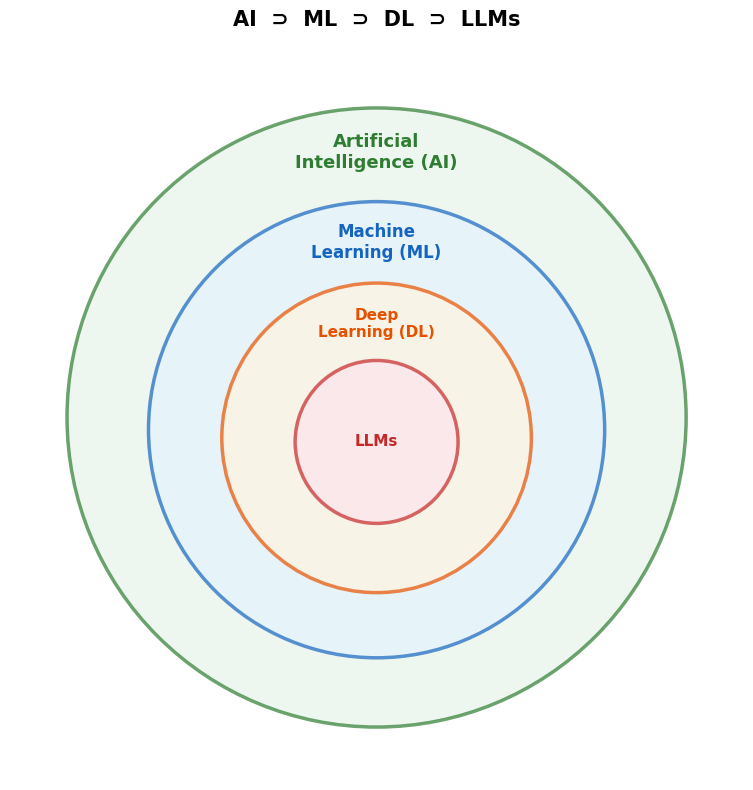

Figure saved: plot01_ai_ml_dl_venn.png


In [2]:
# ============================================================
# PLOT 1: AI / ML / DL / LLM Venn Diagram
# ============================================================
# We draw concentric circles to show the subset relationships:
#   AI  ⊃  ML  ⊃  DL  ⊃  LLMs

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Each circle: (center_x, center_y, radius, label, color)
circles = [
    (0.0, -0.05, 3.8, 'Artificial\nIntelligence (AI)', '#E8F5E9', '#2E7D32'),
    (0.0, -0.2,  2.8, 'Machine\nLearning (ML)',       '#E3F2FD', '#1565C0'),
    (0.0, -0.3,  1.9, 'Deep\nLearning (DL)',          '#FFF3E0', '#E65100'),
    (0.0, -0.35, 1.0, 'LLMs',                         '#FCE4EC', '#C62828'),
]

for cx, cy, r, label, facecolor, edgecolor in circles:
    circle = plt.Circle((cx, cy), r, facecolor=facecolor,
                         edgecolor=edgecolor, linewidth=2.5, alpha=0.7)
    ax.add_patch(circle)

# Add labels
ax.text(0.0, 3.2, 'Artificial\nIntelligence (AI)', ha='center', va='center',
        fontsize=13, fontweight='bold', color='#2E7D32')
ax.text(0.0, 2.1, 'Machine\nLearning (ML)', ha='center', va='center',
        fontsize=12, fontweight='bold', color='#1565C0')
ax.text(0.0, 1.1, 'Deep\nLearning (DL)', ha='center', va='center',
        fontsize=11, fontweight='bold', color='#E65100')
ax.text(0.0, -0.35, 'LLMs', ha='center', va='center',
        fontsize=11, fontweight='bold', color='#C62828')

ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-4.5, 4.5)
ax.set_aspect('equal')
ax.set_title('AI  ⊃  ML  ⊃  DL  ⊃  LLMs', fontsize=15, fontweight='bold', pad=15)
ax.axis('off')

plt.tight_layout()
plt.savefig(SAVE_DIR + 'plot01_ai_ml_dl_venn.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: plot01_ai_ml_dl_venn.png")

---
## 1.2 History of Deep Learning (Slide 3)

Deep learning has evolved through **three major eras**:

| Era | Period | Key Idea | Example Models |
|-----|--------|----------|---------------|
| **Traditional DL** | 2006-2017 | Train from scratch on labeled data | AlexNet, VGG, ResNet |
| **Transfer Learning** | 2017-2020 | Pre-train, then fine-tune | BERT, ELMo, CLIP |
| **Large Language Models** | 2020-present | Massive models, few-shot learning | GPT-3, GPT-4, LLaMA |

### Key Milestones

| Year | Milestone | Significance |
|------|-----------|-------------|
| 1958 | Perceptron | First neural network |
| 1986 | Backpropagation | Training multi-layer networks |
| 1997 | LSTM | Solved vanishing gradient for sequences |
| 2012 | AlexNet | Deep CNN wins ImageNet — DL revolution begins |
| 2014 | GAN | Generative Adversarial Networks |
| 2017 | Transformer | "Attention Is All You Need" paper |
| 2018 | BERT | Bidirectional pre-training for NLP |
| 2018 | GPT-1 | First generative pre-trained transformer |
| 2020 | GPT-3 | 175B parameters, few-shot learning |
| 2023 | GPT-4 | Multimodal, ~1.8T parameters |
| 2023 | LLaMA | Open-source LLM from Meta |

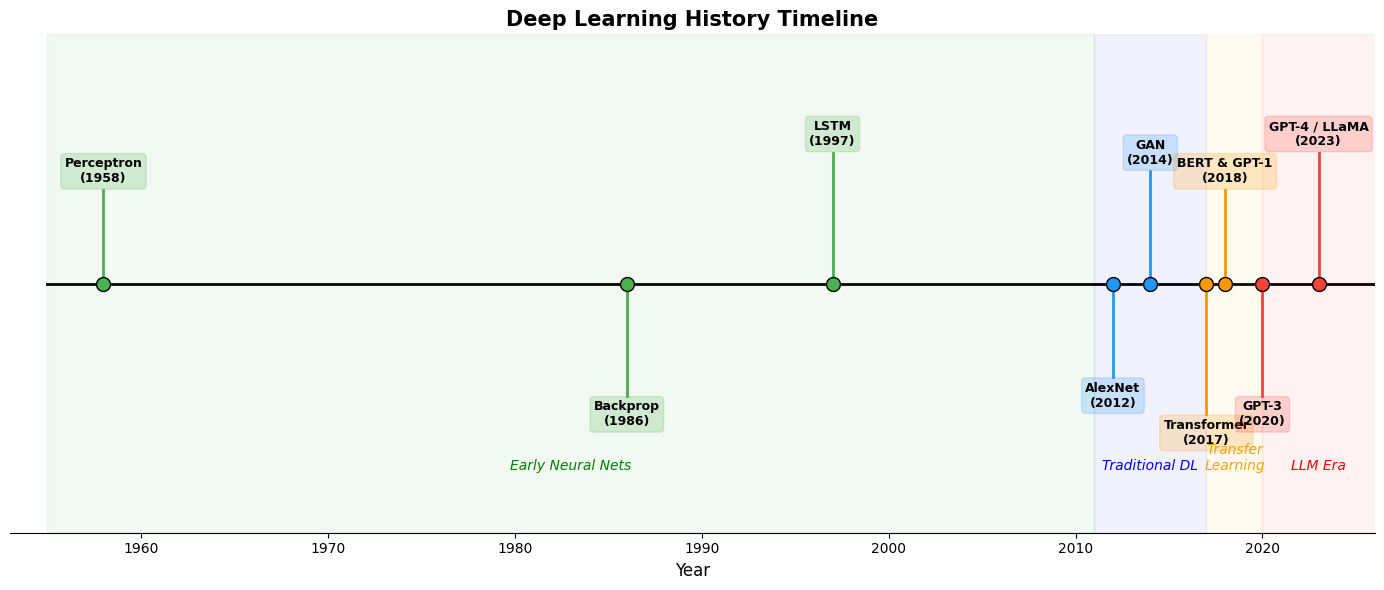

Figure saved: plot02_dl_timeline.png


In [3]:
# ============================================================
# PLOT 2: Deep Learning History Timeline
# ============================================================
fig, ax = plt.subplots(figsize=(14, 6))

# Key milestones: (year, label, era_color)
milestones = [
    (1958, 'Perceptron',       '#4CAF50'),
    (1986, 'Backprop',         '#4CAF50'),
    (1997, 'LSTM',             '#4CAF50'),
    (2012, 'AlexNet',          '#2196F3'),
    (2014, 'GAN',              '#2196F3'),
    (2017, 'Transformer',      '#FF9800'),
    (2018, 'BERT & GPT-1',     '#FF9800'),
    (2020, 'GPT-3',            '#F44336'),
    (2023, 'GPT-4 / LLaMA',   '#F44336'),
]

years   = [m[0] for m in milestones]
labels  = [m[1] for m in milestones]
colors  = [m[2] for m in milestones]

# Draw the main timeline line
ax.plot([1955, 2026], [0, 0], 'k-', linewidth=2, zorder=1)

# Draw vertical stems and dots
for i, (yr, lbl, clr) in enumerate(milestones):
    # Alternate above and below for readability
    direction = 1 if i % 2 == 0 else -1
    stem_height = direction * (1.5 + 0.3 * (i % 3))

    ax.plot([yr, yr], [0, stem_height], color=clr, linewidth=2, zorder=2)
    ax.scatter([yr], [0], color=clr, s=100, zorder=3, edgecolors='black')
    ax.text(yr, stem_height + direction * 0.3, f'{lbl}\n({yr})',
            ha='center', va='center', fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor=clr, alpha=0.2, edgecolor=clr))

# Era labels
ax.axvspan(1955, 2011, alpha=0.05, color='green')
ax.axvspan(2011, 2017, alpha=0.05, color='blue')
ax.axvspan(2017, 2020, alpha=0.05, color='orange')
ax.axvspan(2020, 2026, alpha=0.05, color='red')

ax.text(1983, -3.0, 'Early Neural Nets', ha='center', fontsize=10, fontstyle='italic', color='green')
ax.text(2014, -3.0, 'Traditional DL', ha='center', fontsize=10, fontstyle='italic', color='blue')
ax.text(2018.5, -3.0, 'Transfer\nLearning', ha='center', fontsize=10, fontstyle='italic', color='orange')
ax.text(2023, -3.0, 'LLM Era', ha='center', fontsize=10, fontstyle='italic', color='red')

ax.set_xlim(1953, 2026)
ax.set_ylim(-4, 4)
ax.set_xlabel('Year', fontsize=12)
ax.set_title('Deep Learning History Timeline', fontsize=15, fontweight='bold')
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig(SAVE_DIR + 'plot02_dl_timeline.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: plot02_dl_timeline.png")

---
## 1.3 Traditional Deep Learning — Pros & Cons (Slide 4)

| | Pros | Cons |
|---|------|------|
| 1 | Powerful automatic feature learning | Requires lots of **labeled data** |
| 2 | Excellent at pattern recognition | **Computationally expensive** (needs GPUs) |
| 3 | State-of-the-art on images, speech, text | Hard to **interpret** ("black box") |
| 4 | Scales well with more data | Prone to **overfitting** on small datasets |
| 5 | End-to-end learning (raw input to output) | **Long training times** (days to weeks) |

### The Key Problem Traditional DL Solves (and Creates)

```
Traditional ML Pipeline:
  Raw Data  →  [Hand-crafted Features]  →  Classifier  →  Output
                    ↑ human effort

Traditional DL Pipeline:
  Raw Data  →  [Neural Network learns features automatically]  →  Output
                    ↑ needs lots of data + compute
```

This tension — **powerful but data-hungry** — is exactly what motivated the next
era: **Transfer Learning**.

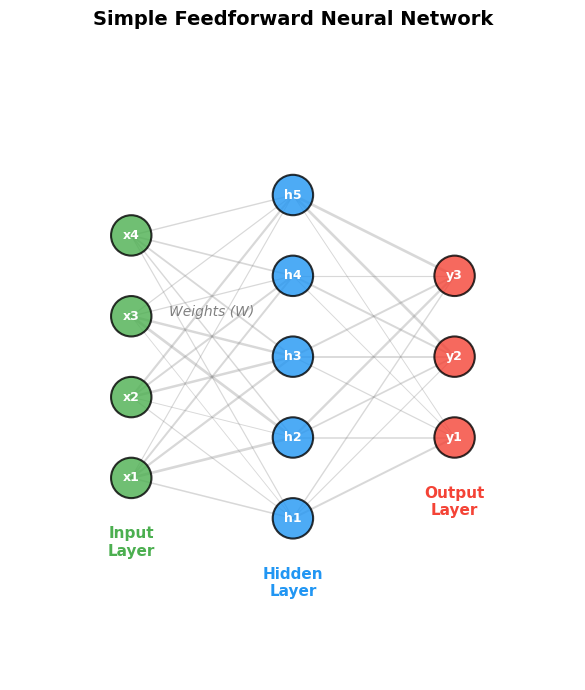

Figure saved: plot03_neural_network.png


In [4]:
# ============================================================
# PLOT 3: Simple Neural Network Diagram
# ============================================================
# Visualize a basic feedforward neural network with 3 layers
# Input (4 nodes) → Hidden (5 nodes) → Output (3 nodes)

fig, ax = plt.subplots(figsize=(10, 7))

layer_sizes = [4, 5, 3]
layer_names = ['Input\nLayer', 'Hidden\nLayer', 'Output\nLayer']
layer_colors = ['#4CAF50', '#2196F3', '#F44336']

# Positions for each layer
x_positions = [1, 3, 5]
y_positions = []

for size in layer_sizes:
    # Center the nodes vertically
    y_start = -(size - 1) / 2.0
    y_positions.append([y_start + i for i in range(size)])

# Draw connections first (behind nodes)
for layer_idx in range(len(layer_sizes) - 1):
    for i, y1 in enumerate(y_positions[layer_idx]):
        for j, y2 in enumerate(y_positions[layer_idx + 1]):
            # Random weight for line thickness
            weight = np.random.uniform(0.3, 1.0)
            ax.plot([x_positions[layer_idx], x_positions[layer_idx + 1]],
                    [y1, y2], 'gray', alpha=0.3, linewidth=weight * 2)

# Draw nodes
for layer_idx, (x, ys, color, name) in enumerate(
        zip(x_positions, y_positions, layer_colors, layer_names)):
    for i, y in enumerate(ys):
        circle = plt.Circle((x, y), 0.25, facecolor=color,
                             edgecolor='black', linewidth=1.5, zorder=5, alpha=0.8)
        ax.add_patch(circle)
        # Label the node
        if layer_idx == 0:
            ax.text(x, y, f'x{i+1}', ha='center', va='center',
                    fontsize=9, fontweight='bold', color='white', zorder=6)
        elif layer_idx == len(layer_sizes) - 1:
            ax.text(x, y, f'y{i+1}', ha='center', va='center',
                    fontsize=9, fontweight='bold', color='white', zorder=6)
        else:
            ax.text(x, y, f'h{i+1}', ha='center', va='center',
                    fontsize=9, fontweight='bold', color='white', zorder=6)
    # Layer label
    ax.text(x, min(ys) - 0.8, name, ha='center', va='center',
            fontsize=11, fontweight='bold', color=color)

# Annotations
ax.annotate('Weights (W)', xy=(2, 0.5), fontsize=10, fontstyle='italic',
            color='gray', ha='center')

ax.set_xlim(-0.5, 6.5)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
ax.set_title('Simple Feedforward Neural Network', fontsize=14, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.savefig(SAVE_DIR + 'plot03_neural_network.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: plot03_neural_network.png")

---
## 1.4 Code Demo — Simple Neural Network Forward Pass

A neural network computes outputs through a series of matrix multiplications
and activation functions. Let us build one from scratch using only NumPy.

### How a Single Layer Works

```
 Input (x)       Weights (W)      Bias (b)       Activation
 [4 values]  ×  [4×5 matrix]  +  [5 values]  →  ReLU  →  [5 values]
```

The formula for one layer:   **h = activation(W . x + b)**

In [5]:
# ============================================================
# CODE DEMO 1: Simple Neural Network Forward Pass
# ============================================================
# We will build a 2-layer neural network from scratch.
#
# Architecture:
#   Input (4 features) → Hidden (5 neurons, ReLU) → Output (3 classes, softmax)
#
# ASCII Diagram:
#   x1 ──┐
#   x2 ──┼──→ [W1·x + b1] → ReLU → h1,h2,...,h5 → [W2·h + b2] → softmax → y1,y2,y3
#   x3 ──┤
#   x4 ──┘

# ------ Step 1: Define activation functions ------

def relu(z):
    '''ReLU activation: max(0, z). Turns negative values to zero.'''
    return np.maximum(0, z)

def softmax(z):
    '''Softmax: converts raw scores to probabilities that sum to 1.'''
    exp_z = np.exp(z - np.max(z))   # subtract max for numerical stability
    return exp_z / exp_z.sum()

# ------ Step 2: Initialize random weights and biases ------
# In a real network these are learned. Here we use random values.

W1 = np.random.randn(5, 4) * 0.5   # 5 hidden neurons, 4 inputs
b1 = np.zeros(5)                    # bias for hidden layer

W2 = np.random.randn(3, 5) * 0.5   # 3 output classes, 5 hidden neurons
b2 = np.zeros(3)                    # bias for output layer

print("Weight shapes:")
print(f"  W1: {W1.shape}  (hidden_size × input_size)")
print(f"  b1: {b1.shape}  (hidden_size)")
print(f"  W2: {W2.shape}  (output_size × hidden_size)")
print(f"  b2: {b2.shape}  (output_size)")

# ------ Step 3: Create a sample input ------
x = np.array([1.0, 0.5, -0.3, 0.8])
print(f"\nInput x: {x}")

# ------ Step 4: Forward pass (layer by layer) ------

# Layer 1: Linear transformation + ReLU
z1 = W1 @ x + b1          # matrix multiply + bias
h  = relu(z1)              # apply activation
print(f"\nHidden layer (before ReLU): {z1.round(3)}")
print(f"Hidden layer (after  ReLU): {h.round(3)}")

# Layer 2: Linear transformation + Softmax
z2 = W2 @ h + b2           # matrix multiply + bias
y  = softmax(z2)            # convert to probabilities
print(f"\nOutput (before softmax): {z2.round(3)}")
print(f"Output (after  softmax): {y.round(3)}")
print(f"Sum of probabilities:    {y.sum():.6f}  (should be ~1.0)")

# ------ Step 5: Interpret the result ------
classes = ['Cat', 'Dog', 'Bird']
predicted = classes[np.argmax(y)]
print(f"\nPredicted class: {predicted} (confidence: {y.max():.1%})")

Weight shapes:
  W1: (5, 4)  (hidden_size × input_size)
  b1: (5,)  (hidden_size)
  W2: (3, 5)  (output_size × hidden_size)
  b2: (3,)  (output_size)

Input x: [ 1.   0.5 -0.3  0.8]

Hidden layer (before ReLU): [-0.361 -0.473  0.609  2.007 -1.232]
Hidden layer (after  ReLU): [0.    0.    0.609 2.007 0.   ]

Output (before softmax): [-0.209  0.022 -0.466]
Output (after  softmax): [0.33  0.415 0.255]
Sum of probabilities:    1.000000  (should be ~1.0)

Predicted class: Dog (confidence: 41.5%)


---
# Part 2 — Transfer Learning & Key Models (Slides 5-8)

## 2.1 What is Transfer Learning? (Slide 5)

**Transfer Learning** is the idea of taking a model that was trained on a
**large, general dataset** and then **fine-tuning** it on a smaller,
**task-specific dataset**.

### Analogy

Think of it like learning to drive:
1. **Pre-training**: You learn general driving skills (steering, braking, rules)
2. **Fine-tuning**: You practice specifically for city driving or highway driving

```
  ┌──────────────────────────┐      ┌──────────────────────────┐
  │     PRE-TRAINING         │      │      FINE-TUNING         │
  │                          │      │                          │
  │  Large General Dataset   │      │  Small Task Dataset      │
  │  (Wikipedia, Books,      │ ───→ │  (Medical texts,         │
  │   Internet text)         │      │   Legal docs, etc.)      │
  │                          │      │                          │
  │  → Base Model            │      │  → Specialized Model     │
  └──────────────────────────┘      └──────────────────────────┘
```

### Why Transfer Learning?

| Without Transfer Learning | With Transfer Learning |
|--------------------------|----------------------|
| Train from scratch every time | Reuse pre-trained knowledge |
| Need millions of labeled examples | Only need hundreds/thousands |
| Weeks of training | Hours of fine-tuning |
| Often worse performance | Better performance |
| Every task starts from zero | Knowledge accumulates |

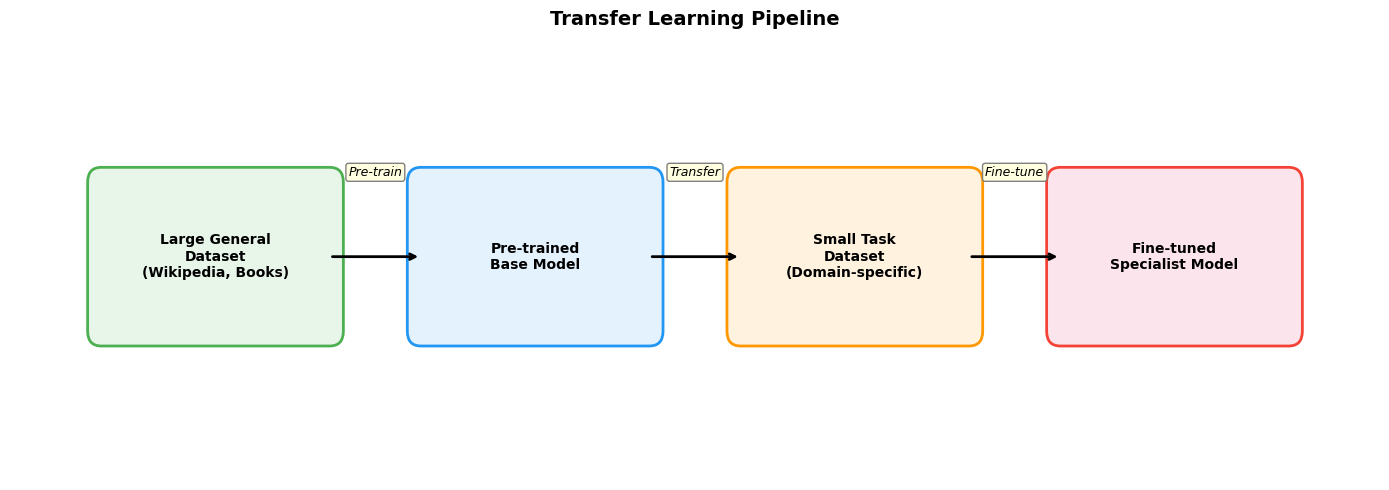

Figure saved: plot04_transfer_learning.png


In [6]:
# ============================================================
# PLOT 4: Transfer Learning Pipeline
# ============================================================
fig, ax = plt.subplots(figsize=(14, 5))

# Draw boxes for each stage
boxes = [
    (0.5, 2, 2.5, 1.5, 'Large General\nDataset\n(Wikipedia, Books)', '#E8F5E9', '#4CAF50'),
    (4.0, 2, 2.5, 1.5, 'Pre-trained\nBase Model', '#E3F2FD', '#2196F3'),
    (7.5, 2, 2.5, 1.5, 'Small Task\nDataset\n(Domain-specific)', '#FFF3E0', '#FF9800'),
    (11.0, 2, 2.5, 1.5, 'Fine-tuned\nSpecialist Model', '#FCE4EC', '#F44336'),
]

for x, y, w, h, text, facecolor, edgecolor in boxes:
    rect = FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.15",
                           facecolor=facecolor, edgecolor=edgecolor, linewidth=2)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, text, ha='center', va='center',
            fontsize=10, fontweight='bold')

# Arrows between boxes
arrow_style = dict(arrowstyle='->', color='black', linewidth=2)
for x_start, x_end, label in [(3.0, 4.0, 'Pre-train'), (6.5, 7.5, 'Transfer'), (10.0, 11.0, 'Fine-tune')]:
    ax.annotate('', xy=(x_end, 2.75), xytext=(x_start, 2.75),
                arrowprops=arrow_style)
    ax.text((x_start + x_end) / 2, 3.6, label,
            ha='center', va='center', fontsize=9, fontstyle='italic',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='lightyellow', edgecolor='gray'))

ax.set_xlim(-0.5, 14.5)
ax.set_ylim(0.5, 5)
ax.set_title('Transfer Learning Pipeline', fontsize=14, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.savefig(SAVE_DIR + 'plot04_transfer_learning.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: plot04_transfer_learning.png")

---
## 2.2 BERT — Bidirectional Encoder Representations from Transformers (Slide 6)

**BERT** (2018, Google) was a breakthrough model that introduced **bidirectional**
context understanding for NLP.

### Key Ideas

| Feature | Description |
|---------|-------------|
| **Architecture** | Encoder-only Transformer |
| **Pre-training Task 1** | Masked Language Modeling (MLM) — predict masked words |
| **Pre-training Task 2** | Next Sentence Prediction (NSP) — predict if two sentences follow each other |
| **Direction** | Bidirectional — reads text in both directions simultaneously |
| **Fine-tuning** | Add a task-specific head for sentiment, QA, NER, etc. |

### Masked Language Modeling (MLM) — ASCII Diagram

```
  Input:    "The [MASK] sat on the [MASK]"
                  ↓                  ↓
  BERT:     ┌─────────────────────────────┐
            │  Bidirectional Transformer  │
            │  Encoder (12-24 layers)     │
            └─────────────────────────────┘
                  ↓                  ↓
  Output:   "The  cat  sat on the  mat "
                  ↑                  ↑
            Predicted!          Predicted!
```

### How BERT "reads" differently from GPT

```
  GPT  (left-to-right):    The → cat → sat → on → the → mat
                           Each word only sees words BEFORE it.

  BERT (bidirectional):    The ← cat → sat ← on → the ← mat
                           Each word sees ALL other words!
```

---
## 2.3 CLIP — Contrastive Language-Image Pre-training (Slide 7)

**CLIP** (2021, OpenAI) connects **text and images** in a shared space.

| Feature | Description |
|---------|-------------|
| **Training Data** | 400 million image-text pairs from the internet |
| **Text Encoder** | Transformer that encodes text into a vector |
| **Image Encoder** | Vision Transformer (ViT) that encodes images into a vector |
| **Training Objective** | Match correct image-text pairs (contrastive loss) |
| **Superpower** | Zero-shot classification — classify images it has never seen |

### How CLIP Works — ASCII Diagram

```
  Text: "a photo of a cat"     Image: [cat photo]
         │                              │
         ▼                              ▼
  ┌──────────────┐              ┌──────────────┐
  │ Text Encoder │              │Image Encoder │
  │ (Transformer)│              │   (ViT)      │
  └──────┬───────┘              └──────┬───────┘
         │                              │
         ▼                              ▼
     [text_vec]    ←── similarity ──→  [img_vec]
                  (cosine similarity)
         │
         ▼
  High similarity = correct match!
```

---
## 2.4 Large Language Models (LLMs) — Overview (Slide 8)

**LLMs** are very large neural networks trained on massive amounts of text data.
They can generate human-like text and perform a wide range of tasks.

### Key Model Comparison Table

| Model | Organization | Year | Parameters | Architecture | Key Feature |
|-------|-------------|------|-----------|-------------|------------|
| **GPT-2** | OpenAI | 2019 | 1.5B | Decoder-only | Text generation |
| **BERT** | Google | 2018 | 340M | Encoder-only | Bidirectional understanding |
| **GPT-3** | OpenAI | 2020 | 175B | Decoder-only | Few-shot learning |
| **CLIP** | OpenAI | 2021 | 400M | Dual encoder | Vision + Language |
| **GPT-4** | OpenAI | 2023 | ~1.8T (est.) | Decoder-only | Multimodal |
| **LLaMA** | Meta | 2023 | 7B-65B | Decoder-only | Open-source |
| **PaLM** | Google | 2022 | 540B | Decoder-only | Multi-task |
| **Gemini** | Google | 2023 | Unknown | Decoder-only | Multimodal |

---
# Part 3 — Understanding LLMs (Slides 9-12)

## 3.1 Model Parameters Comparison (Slide 9)

A "parameter" is a single learnable number in a neural network (a weight or bias).
More parameters generally means the model can learn more complex patterns.

### Parameters Comparison Table

| Model | Parameters | Relative Size |
|-------|-----------|---------------|
| **GPT-2** | 1.5 Billion | 1x (baseline) |
| **LLaMA-7B** | 7 Billion | ~5x |
| **LLaMA-65B** | 65 Billion | ~43x |
| **GPT-3** | 175 Billion | ~117x |
| **PaLM** | 540 Billion | ~360x |
| **GPT-4** | ~1.8 Trillion (est.) | ~1,200x |

To put this in perspective:
- **GPT-2** (1.5B) ≈ number of people who speak Chinese
- **GPT-3** (175B) ≈ number of stars in the Milky Way
- **GPT-4** (~1.8T) ≈ number of trees on Earth

/tmp/ipykernel_295976/3847346635.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


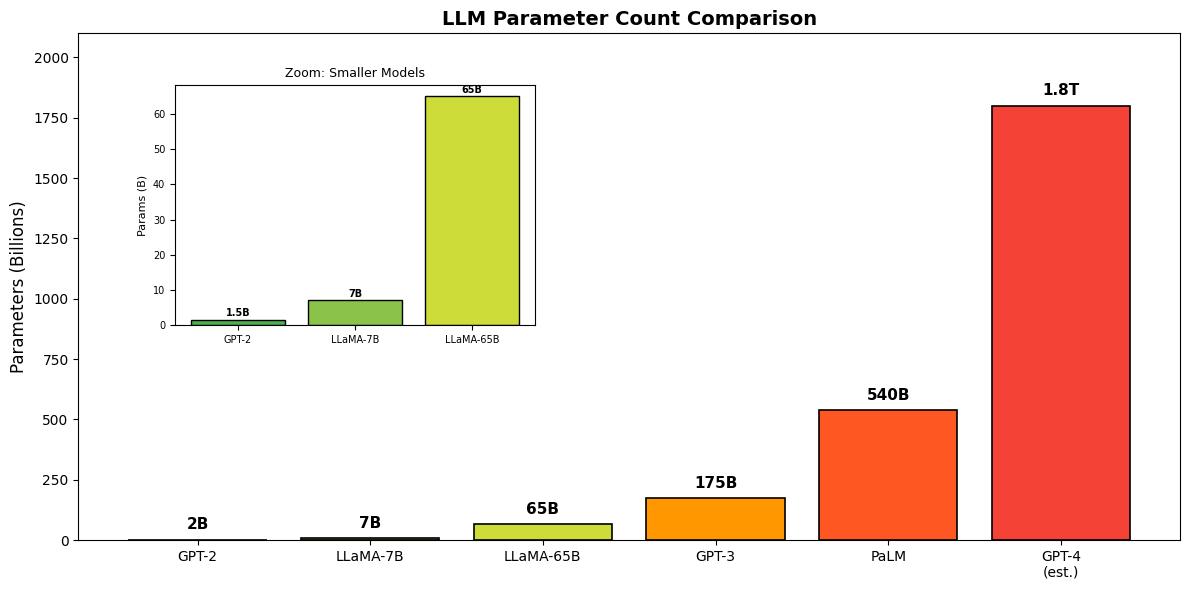

Figure saved: plot05_parameters_comparison.png


In [7]:
# ============================================================
# PLOT 5: Model Parameters Comparison (Bar Chart)
# ============================================================
fig, ax = plt.subplots(figsize=(12, 6))

models = ['GPT-2', 'LLaMA-7B', 'LLaMA-65B', 'GPT-3', 'PaLM', 'GPT-4\n(est.)']
params = [1.5, 7, 65, 175, 540, 1800]  # in billions
colors = ['#4CAF50', '#8BC34A', '#CDDC39', '#FF9800', '#FF5722', '#F44336']

bars = ax.bar(models, params, color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on top of bars
for bar, param in zip(bars, params):
    height = bar.get_height()
    label = f'{param:.0f}B' if param < 1000 else f'{param/1000:.1f}T'
    ax.text(bar.get_x() + bar.get_width() / 2., height + 30,
            label, ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Parameters (Billions)', fontsize=12)
ax.set_title('LLM Parameter Count Comparison', fontsize=14, fontweight='bold')
ax.set_ylim(0, 2100)

# Add a log-scale inset for better comparison of smaller models
inset_ax = fig.add_axes([0.15, 0.45, 0.3, 0.4])  # [left, bottom, width, height]
inset_ax.bar(models[:3], params[:3], color=colors[:3], edgecolor='black', linewidth=1)
inset_ax.set_title('Zoom: Smaller Models', fontsize=9)
inset_ax.set_ylabel('Params (B)', fontsize=8)
inset_ax.tick_params(axis='both', labelsize=7)
for i, (bar_val, m) in enumerate(zip(params[:3], models[:3])):
    inset_ax.text(i, bar_val + 1, f'{bar_val}B', ha='center', fontsize=7, fontweight='bold')

plt.tight_layout()
plt.savefig(SAVE_DIR + 'plot05_parameters_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: plot05_parameters_comparison.png")

---
## 3.2 How LLMs Work (Slide 10)

LLMs process text through a **pipeline** of steps:

| Step | Name | What it Does | Example |
|------|------|-------------|---------|
| 1 | **Tokenization** | Split text into tokens (words/subwords) | "Hello world" → ["Hello", "world"] |
| 2 | **Embedding** | Convert each token to a numerical vector | "Hello" → [0.2, -0.1, 0.8, ...] |
| 3 | **Attention** | Figure out which tokens relate to each other | "The cat sat on the mat" — "cat" attends to "sat" |
| 4 | **Generation** | Predict the next token | "The cat sat on the ___" → "mat" |

### The Pipeline — ASCII Diagram

```
  "The cat sat on the mat"
         │
         ▼
  ┌──────────────┐
  │ Tokenizer    │  →  ["The", "cat", "sat", "on", "the", "mat"]
  └──────┬───────┘
         │
         ▼
  ┌──────────────┐
  │ Embedding    │  →  [[0.2, -0.1, ...], [0.8, 0.3, ...], ...]
  │ Layer        │      (each token becomes a vector of numbers)
  └──────┬───────┘
         │
         ▼
  ┌──────────────┐
  │ Transformer  │  →  Attention + Feed-Forward layers
  │ Layers (×N)  │      (tokens "talk to each other")
  └──────┬───────┘
         │
         ▼
  ┌──────────────┐
  │ Output Head  │  →  Probability over vocabulary
  └──────┬───────┘
         │
         ▼
    Next token: "." (most likely)
```

In [8]:
# ============================================================
# CODE DEMO 2: Simple Tokenization
# ============================================================
# In real LLMs, tokenization uses algorithms like BPE (Byte Pair Encoding).
# Here we demonstrate the CONCEPT with a simple word-level tokenizer.

# Step 1: Build a vocabulary from a sample corpus
corpus = [
    "the cat sat on the mat",
    "the dog ran in the park",
    "a bird flew over the tree",
    "the cat and the dog played"
]

# Build vocabulary: assign each unique word an integer ID
all_words = []
for sentence in corpus:
    all_words.extend(sentence.split())

# Get unique words, sorted alphabetically, with special tokens
vocab = {'<PAD>': 0, '<UNK>': 1}   # special tokens
for word in sorted(set(all_words)):
    if word not in vocab:
        vocab[word] = len(vocab)

print("=== Vocabulary ===")
print(f"Size: {len(vocab)} tokens\n")
for word, idx in vocab.items():
    print(f"  '{word}' → {idx}")

# Step 2: Tokenize a new sentence
def tokenize(sentence, vocab):
    '''Convert a sentence into a list of token IDs.'''
    tokens = sentence.lower().split()
    ids = [vocab.get(word, vocab['<UNK>']) for word in tokens]
    return tokens, ids

# Test it
test_sentence = "the cat ran over the park"
tokens, ids = tokenize(test_sentence, vocab)

print(f"\n=== Tokenization Example ===")
print(f"Input:  '{test_sentence}'")
print(f"Tokens: {tokens}")
print(f"IDs:    {ids}")

# Show a word not in vocabulary
test2 = "the elephant danced on the mat"
tokens2, ids2 = tokenize(test2, vocab)
print(f"\nInput:  '{test2}'")
print(f"Tokens: {tokens2}")
print(f"IDs:    {ids2}")
print(f"Note: 'elephant' and 'danced' map to <UNK> (ID=1) since they are not in our vocabulary")

=== Vocabulary ===
Size: 18 tokens

  '<PAD>' → 0
  '<UNK>' → 1
  'a' → 2
  'and' → 3
  'bird' → 4
  'cat' → 5
  'dog' → 6
  'flew' → 7
  'in' → 8
  'mat' → 9
  'on' → 10
  'over' → 11
  'park' → 12
  'played' → 13
  'ran' → 14
  'sat' → 15
  'the' → 16
  'tree' → 17

=== Tokenization Example ===
Input:  'the cat ran over the park'
Tokens: ['the', 'cat', 'ran', 'over', 'the', 'park']
IDs:    [16, 5, 14, 11, 16, 12]

Input:  'the elephant danced on the mat'
Tokens: ['the', 'elephant', 'danced', 'on', 'the', 'mat']
IDs:    [16, 1, 1, 10, 16, 9]
Note: 'elephant' and 'danced' map to <UNK> (ID=1) since they are not in our vocabulary


---
## 3.3 Word Embeddings

After tokenization, each token ID is converted to a **vector** (list of numbers)
called an **embedding**. Words with similar meanings get similar vectors.

| Word | Embedding Vector (simplified) |
|------|------------------------------|
| "king" | [0.8, 0.2, 0.9, 0.1] |
| "queen" | [0.7, 0.3, 0.9, 0.8] |
| "man" | [0.8, 0.1, 0.1, 0.1] |
| "woman" | [0.7, 0.2, 0.1, 0.8] |

Famous relationship: **king - man + woman ≈ queen**

In [9]:
# ============================================================
# CODE DEMO 3: Word Embedding Visualization
# ============================================================
# We create random embeddings and show how "similar" words
# cluster together. In real models, embeddings are LEARNED.

# Create a mini embedding matrix: vocab_size x embedding_dim
vocab_size = len(vocab)
embedding_dim = 8

# Random embedding matrix (in real LLMs, this is learned from data)
embedding_matrix = np.random.randn(vocab_size, embedding_dim) * 0.5

# Make semantically similar words have similar embeddings (for demo)
# Let's manually adjust some embeddings to show clustering
# Animals: cat, dog, bird → make them similar
cat_id = vocab['cat']
dog_id = vocab['dog']
bird_id = vocab.get('bird', 1)

# Give animals similar base vector
animal_base = np.array([0.8, 0.6, -0.2, 0.1, 0.5, -0.3, 0.7, 0.2])
embedding_matrix[cat_id]  = animal_base + np.random.randn(embedding_dim) * 0.1
embedding_matrix[dog_id]  = animal_base + np.random.randn(embedding_dim) * 0.1
if bird_id != 1:
    embedding_matrix[bird_id] = animal_base + np.random.randn(embedding_dim) * 0.15

# Look up embeddings for some words
def get_embedding(word):
    '''Look up the embedding vector for a word.'''
    idx = vocab.get(word, vocab['<UNK>'])
    return embedding_matrix[idx]

# Compute cosine similarity between two words
def cosine_similarity(a, b):
    '''Cosine similarity: dot(a,b) / (|a| * |b|). Range: -1 to 1.'''
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Show similarities
words_to_compare = ['cat', 'dog', 'sat', 'the', 'mat', 'on']
print("=== Cosine Similarity Between Word Embeddings ===\n")
print(f"{'':>8}", end='')
for w in words_to_compare:
    print(f"{w:>8}", end='')
print()

for w1 in words_to_compare:
    print(f"{w1:>8}", end='')
    e1 = get_embedding(w1)
    for w2 in words_to_compare:
        e2 = get_embedding(w2)
        sim = cosine_similarity(e1, e2)
        print(f"{sim:>8.3f}", end='')
    print()

print("\nNotice: 'cat' and 'dog' have HIGH similarity (both animals).")
print("Other pairs have lower similarity.")

=== Cosine Similarity Between Word Embeddings ===

             cat     dog     sat     the     mat      on
     cat   1.000   0.978  -0.185   0.163  -0.096   0.089
     dog   0.978   1.000  -0.234   0.048  -0.149   0.060
     sat  -0.185  -0.234   1.000  -0.178  -0.406   0.294
     the   0.163   0.048  -0.178   1.000   0.439  -0.332
     mat  -0.096  -0.149  -0.406   0.439   1.000   0.043
      on   0.089   0.060   0.294  -0.332   0.043   1.000

Notice: 'cat' and 'dog' have HIGH similarity (both animals).
Other pairs have lower similarity.


---
## 3.4 Importance & Applications of LLMs (Slide 11)

LLMs have revolutionized many fields. Here are the key applications:

| Application | Description | Example |
|-------------|-------------|---------|
| **Code Generation** | Write, debug, explain code | GitHub Copilot, ChatGPT |
| **Translation** | Translate between languages | Google Translate (modern) |
| **Summarization** | Condense long text | News article summaries |
| **Question Answering** | Answer questions from context | Customer support bots |
| **Creative Writing** | Generate stories, poems, scripts | AI writing assistants |
| **Medical** | Help diagnose, summarize records | Med-PaLM |
| **Legal** | Analyze contracts, find precedents | Harvey AI |
| **Education** | Personalized tutoring | Khan Academy + GPT |

## 3.5 Gemini — Google's Multimodal Model (Slide 12)

| Feature | Description |
|---------|-------------|
| **Developer** | Google DeepMind |
| **Modalities** | Text + Images + Audio + Video |
| **Versions** | Ultra, Pro, Nano |
| **Key Feature** | Natively multimodal (not text-only + add-ons) |
| **Use Cases** | Visual QA, video understanding, code analysis |

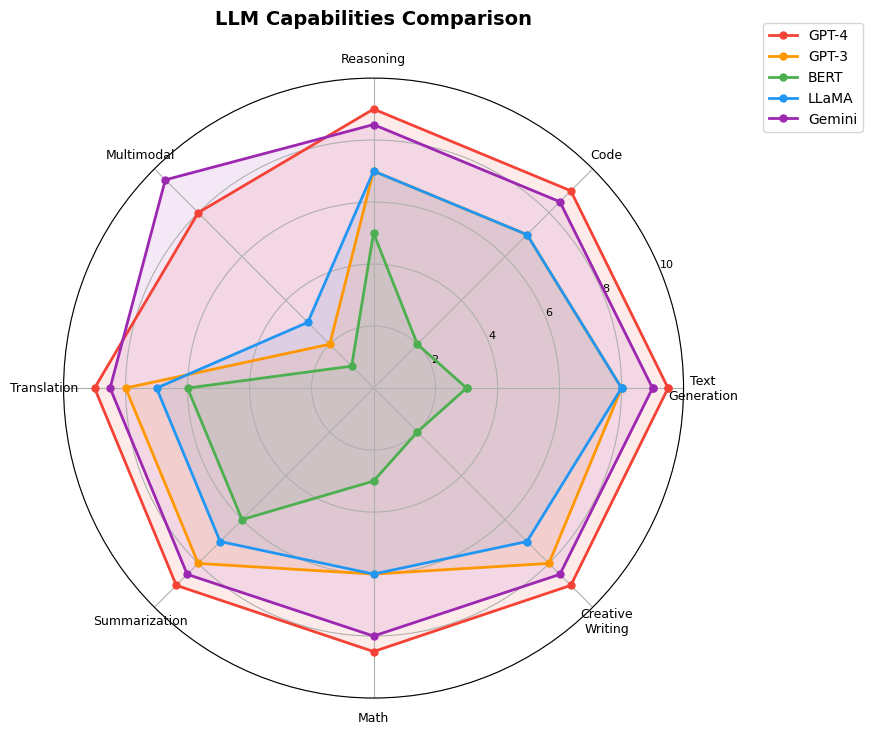

Figure saved: plot06_radar_chart.png


In [10]:
# ============================================================
# PLOT 6: LLM Capabilities Radar Chart
# ============================================================
# Compare different models across multiple capability dimensions

categories = ['Text\nGeneration', 'Code', 'Reasoning', 'Multimodal',
              'Translation', 'Summarization', 'Math', 'Creative\nWriting']
N = len(categories)

# Scores for each model (1-10 scale, illustrative)
models_data = {
    'GPT-4':   [9.5, 9, 9, 8, 9, 9, 8.5, 9],
    'GPT-3':   [8, 7, 7, 2, 8, 8, 6, 8],
    'BERT':    [3, 2, 5, 1, 6, 6, 3, 2],
    'LLaMA':   [8, 7, 7, 3, 7, 7, 6, 7],
    'Gemini':  [9, 8.5, 8.5, 9.5, 8.5, 8.5, 8, 8.5],
}

# Compute angles for radar chart
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the polygon

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

colors_radar = ['#F44336', '#FF9800', '#4CAF50', '#2196F3', '#9C27B0']

for (model_name, scores), color in zip(models_data.items(), colors_radar):
    values = scores + scores[:1]  # close the polygon
    ax.fill(angles, values, alpha=0.1, color=color)
    ax.plot(angles, values, 'o-', linewidth=2, color=color, label=model_name, markersize=5)

# Set the labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=9)
ax.set_ylim(0, 10)
ax.set_yticks([2, 4, 6, 8, 10])
ax.set_yticklabels(['2', '4', '6', '8', '10'], fontsize=8)
ax.set_title('LLM Capabilities Comparison', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)

plt.tight_layout()
plt.savefig(SAVE_DIR + 'plot06_radar_chart.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: plot06_radar_chart.png")

---
# Part 4 — History & Architecture Evolution (Slides 13-18)

## 4.1 Brief History — From Perceptrons to Transformers (Slide 13)

The path from early neural networks to modern LLMs:

```
1958: Perceptron (single neuron)
        │
        ▼
1986: Multi-layer networks + Backpropagation
        │
        ▼
1997: LSTM / GRU (handle sequences)
        │
        ▼
2012: AlexNet (deep CNNs for images)
        │
        ▼
2014: Seq2Seq + Attention (machine translation)
        │
        ▼
2017: Transformer — "Attention Is All You Need"
        │
        ├──→ 2018: BERT (encoder-only)
        │
        ├──→ 2018: GPT-1 (decoder-only)
        │
        ├──→ 2020: GPT-3 (175B parameters)
        │
        └──→ 2023: GPT-4 / LLaMA / Gemini
```

## 4.2 RNN and LSTM (Slide 14)

**RNN (Recurrent Neural Network)** processes sequences one step at a time,
carrying a "hidden state" that acts as memory.

### RNN Unrolled — ASCII Diagram

```
  x₁        x₂        x₃        x₄
  │          │          │          │
  ▼          ▼          ▼          ▼
┌────┐    ┌────┐    ┌────┐    ┌────┐
│ h₁ │───→│ h₂ │───→│ h₃ │───→│ h₄ │
└────┘    └────┘    └────┘    └────┘
  │          │          │          │
  ▼          ▼          ▼          ▼
  y₁        y₂        y₃        y₄

  Each hidden state hₜ = f(W_h · hₜ₋₁ + W_x · xₜ + b)
```

### The Vanishing Gradient Problem

| Problem | Cause | Solution |
|---------|-------|---------|
| **Vanishing gradients** | Repeated multiplication of small numbers | LSTM gates |
| **Exploding gradients** | Repeated multiplication of large numbers | Gradient clipping |

### LSTM (Long Short-Term Memory)

LSTM adds **gates** that control what information to keep or forget:

| Gate | Function | Analogy |
|------|----------|---------|
| **Forget gate** | Decide what to throw away | Cleaning out your desk |
| **Input gate** | Decide what new info to store | Choosing what notes to keep |
| **Output gate** | Decide what to output | Choosing what to say |

---
## 4.3 The Self-Attention Revolution (Slide 15)

### The Problem with RNNs

RNNs process tokens **one at a time** (sequentially). This means:
- **Slow**: Cannot parallelize
- **Long-range forgetting**: Hard to remember things from 100 tokens ago

### The Solution: Self-Attention

**Self-Attention** allows each token to "look at" **every other token** simultaneously.

| Feature | RNN | Self-Attention |
|---------|-----|---------------|
| Processing | Sequential (one at a time) | Parallel (all at once) |
| Long-range deps | Difficult | Easy |
| Speed | Slow | Fast (on GPUs) |
| Key paper | 1986 | "Attention Is All You Need" (2017) |

### How Self-Attention Works (Intuition)

For each word in a sentence:
1. Create three vectors: **Query (Q)**, **Key (K)**, **Value (V)**
2. Compare the Query with all Keys to get **attention scores**
3. Use scores to compute a **weighted sum** of Values

```
  Word: "cat"
    Q_cat = "What am I looking for?"
    K_cat = "What do I contain?"
    V_cat = "What information do I provide?"

  Attention("cat" → "sat") = softmax(Q_cat · K_sat) × V_sat
```

In [11]:
# ============================================================
# CODE DEMO 4: Attention Score Computation from Scratch
# ============================================================
# We implement the scaled dot-product attention mechanism.
#
# Formula:  Attention(Q, K, V) = softmax(Q · K^T / sqrt(d_k)) · V
#
# Where:
#   Q = Query matrix    (what each token is "asking for")
#   K = Key matrix      (what each token "offers")
#   V = Value matrix    (the actual information)
#   d_k = dimension of keys (for scaling)

def scaled_dot_product_attention(Q, K, V):
    '''
    Compute scaled dot-product attention.

    Parameters:
      Q: Query matrix  (seq_len, d_k)
      K: Key matrix    (seq_len, d_k)
      V: Value matrix  (seq_len, d_v)

    Returns:
      output: Weighted values  (seq_len, d_v)
      weights: Attention weights (seq_len, seq_len)
    '''
    d_k = K.shape[-1]

    # Step 1: Compute raw attention scores
    # Q · K^T gives a (seq_len × seq_len) matrix
    scores = Q @ K.T

    # Step 2: Scale by sqrt(d_k) to prevent huge numbers
    scores = scores / np.sqrt(d_k)

    # Step 3: Apply softmax to get probabilities (each row sums to 1)
    exp_scores = np.exp(scores - np.max(scores, axis=-1, keepdims=True))
    weights = exp_scores / exp_scores.sum(axis=-1, keepdims=True)

    # Step 4: Weighted sum of values
    output = weights @ V

    return output, weights


# === Example: "The cat sat on the mat" ===
words = ["The", "cat", "sat", "on", "the", "mat"]
seq_len = len(words)
d_model = 8  # embedding dimension

# Create random embeddings for each word
np.random.seed(42)
embeddings = np.random.randn(seq_len, d_model) * 0.5

# In real transformers, Q/K/V come from learned linear projections.
# Here we use simple random projections for demonstration.
W_Q = np.random.randn(d_model, d_model) * 0.3
W_K = np.random.randn(d_model, d_model) * 0.3
W_V = np.random.randn(d_model, d_model) * 0.3

Q = embeddings @ W_Q  # (6, 8)
K = embeddings @ W_K  # (6, 8)
V = embeddings @ W_V  # (6, 8)

output, attention_weights = scaled_dot_product_attention(Q, K, V)

print("=== Scaled Dot-Product Attention ===\n")
print(f"Sequence: {words}")
print(f"Embedding dim: {d_model}")
print(f"Q shape: {Q.shape}")
print(f"K shape: {K.shape}")
print(f"V shape: {V.shape}")
print(f"Attention weights shape: {attention_weights.shape}")
print(f"Output shape: {output.shape}")
print(f"\nAttention weights (each row = how much each word attends to others):")
print(f"{'':>6}", end='')
for w in words:
    print(f"{w:>6}", end='')
print()
for i, w in enumerate(words):
    print(f"{w:>6}", end='')
    for j in range(seq_len):
        print(f"{attention_weights[i, j]:>6.3f}", end='')
    print()

=== Scaled Dot-Product Attention ===

Sequence: ['The', 'cat', 'sat', 'on', 'the', 'mat']
Embedding dim: 8
Q shape: (6, 8)
K shape: (6, 8)
V shape: (6, 8)
Attention weights shape: (6, 6)
Output shape: (6, 8)

Attention weights (each row = how much each word attends to others):
         The   cat   sat    on   the   mat
   The 0.128 0.189 0.162 0.143 0.215 0.162
   cat 0.221 0.134 0.170 0.184 0.129 0.161
   sat 0.188 0.157 0.163 0.179 0.145 0.169
    on 0.177 0.171 0.177 0.188 0.126 0.161
   the 0.286 0.106 0.164 0.173 0.109 0.162
   mat 0.197 0.155 0.166 0.187 0.133 0.162


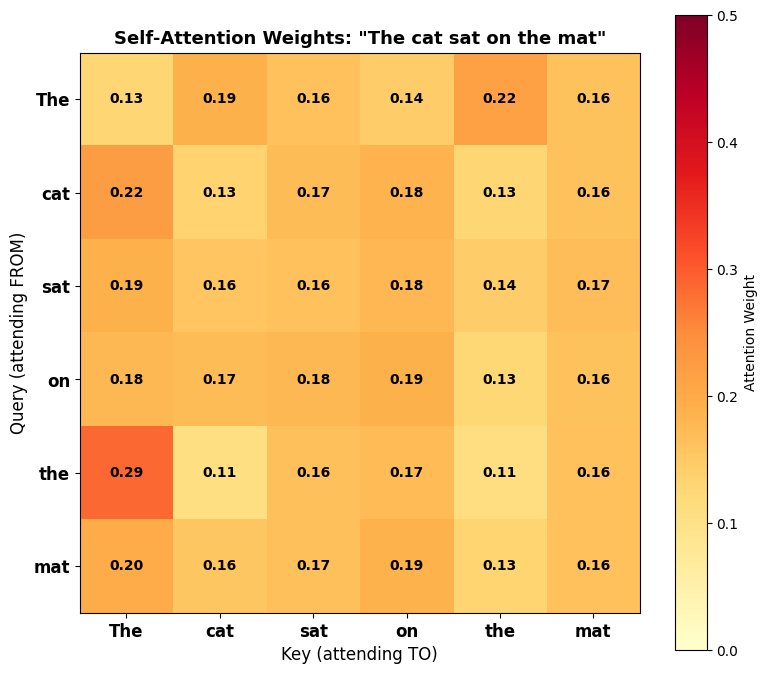

Figure saved: plot07_attention_heatmap.png


In [12]:
# ============================================================
# PLOT 7: Self-Attention Heatmap
# ============================================================
fig, ax = plt.subplots(figsize=(8, 7))

im = ax.imshow(attention_weights, cmap='YlOrRd', aspect='equal', vmin=0, vmax=0.5)

# Labels
ax.set_xticks(range(seq_len))
ax.set_yticks(range(seq_len))
ax.set_xticklabels(words, fontsize=12, fontweight='bold')
ax.set_yticklabels(words, fontsize=12, fontweight='bold')
ax.set_xlabel('Key (attending TO)', fontsize=12)
ax.set_ylabel('Query (attending FROM)', fontsize=12)

# Add value annotations
for i in range(seq_len):
    for j in range(seq_len):
        color = 'white' if attention_weights[i, j] > 0.3 else 'black'
        ax.text(j, i, f'{attention_weights[i, j]:.2f}',
                ha='center', va='center', fontsize=10, color=color, fontweight='bold')

plt.colorbar(im, ax=ax, label='Attention Weight')
ax.set_title('Self-Attention Weights: "The cat sat on the mat"',
             fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig(SAVE_DIR + 'plot07_attention_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: plot07_attention_heatmap.png")

---
## 4.4 The Transformer Architecture (Slide 16)

The Transformer was introduced in the paper **"Attention Is All You Need"** (2017).
It replaced RNNs entirely with self-attention.

### Transformer Components Table

| Component | Purpose | Details |
|-----------|---------|---------|
| **Input Embedding** | Convert tokens to vectors | Learned lookup table |
| **Positional Encoding** | Add position information | Since attention has no notion of order |
| **Multi-Head Attention** | Attend to different aspects | Multiple attention heads in parallel |
| **Feed-Forward Network** | Process each position | Two linear layers + ReLU |
| **Layer Normalization** | Stabilize training | Normalize across features |
| **Residual Connections** | Prevent vanishing gradients | Add input to output of each sub-layer |
| **Encoder** | Understand input | Stack of N identical layers |
| **Decoder** | Generate output | Stack of N layers + cross-attention |

### Transformer Encoder Block — ASCII Diagram

```
              Input Embeddings + Positional Encoding
                           │
                           ▼
              ┌────────────────────────┐
              │   Multi-Head           │
         ┌───│   Self-Attention        │
         │    └────────────┬───────────┘
         │                 │
         └──── Add & Norm ─┤  ← Residual Connection
                           │
              ┌────────────┴───────────┐
              │   Feed-Forward         │
         ┌───│   Network (FFN)        │
         │    └────────────┬───────────┘
         │                 │
         └──── Add & Norm ─┤  ← Residual Connection
                           │
                           ▼
                    Output Embeddings

              (Repeat this block N times)
```

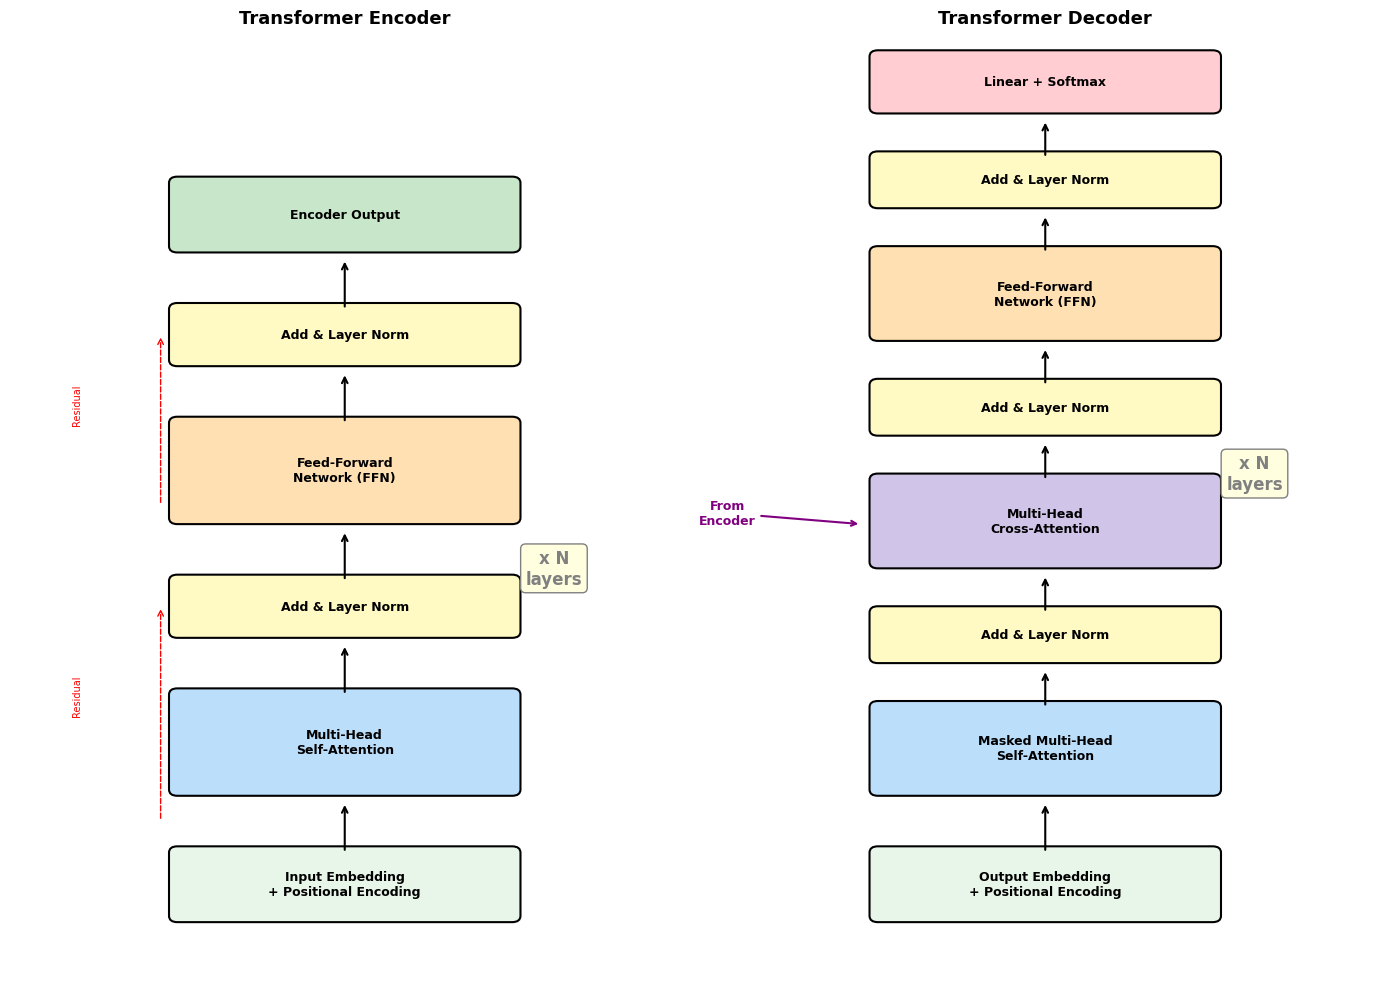

Figure saved: plot08_transformer_architecture.png


In [13]:
# ============================================================
# PLOT 8: Transformer Architecture Overview
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

def draw_block(ax, x, y, w, h, text, color, text_color='black', fontsize=9):
    '''Draw a rounded rectangle with text inside.'''
    rect = FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.1",
                           facecolor=color, edgecolor='black', linewidth=1.5)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, text, ha='center', va='center',
            fontsize=fontsize, fontweight='bold', color=text_color)

def draw_arrow(ax, x1, y1, x2, y2):
    '''Draw an arrow from (x1,y1) to (x2,y2).'''
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5))

# === LEFT: Encoder ===
ax = axes[0]
ax.set_xlim(-1, 7)
ax.set_ylim(-1, 14)
ax.set_title('Transformer Encoder', fontsize=13, fontweight='bold')
ax.axis('off')

# Input
draw_block(ax, 1, 0, 4, 1, 'Input Embedding\n+ Positional Encoding', '#E8F5E9')
draw_arrow(ax, 3, 1, 3, 1.8)

# Multi-Head Self-Attention
draw_block(ax, 1, 2, 4, 1.5, 'Multi-Head\nSelf-Attention', '#BBDEFB')
draw_arrow(ax, 3, 3.5, 3, 4.3)

# Add & Norm
draw_block(ax, 1, 4.5, 4, 0.8, 'Add & Layer Norm', '#FFF9C4')
draw_arrow(ax, 3, 5.3, 3, 6.1)

# FFN
draw_block(ax, 1, 6.3, 4, 1.5, 'Feed-Forward\nNetwork (FFN)', '#FFE0B2')
draw_arrow(ax, 3, 7.8, 3, 8.6)

# Add & Norm
draw_block(ax, 1, 8.8, 4, 0.8, 'Add & Layer Norm', '#FFF9C4')
draw_arrow(ax, 3, 9.6, 3, 10.4)

# Output
draw_block(ax, 1, 10.6, 4, 1, 'Encoder Output', '#C8E6C9')

# "Nx" label
ax.text(5.5, 5.5, 'x N\nlayers', fontsize=12, fontweight='bold',
        ha='center', va='center', color='gray',
        bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='gray'))

# Residual connection arrows
ax.annotate('', xy=(0.8, 4.9), xytext=(0.8, 1.5),
            arrowprops=dict(arrowstyle='->', color='red', linewidth=1, linestyle='dashed'))
ax.text(-0.2, 3.2, 'Residual', fontsize=7, color='red', rotation=90, ha='center')

ax.annotate('', xy=(0.8, 9.2), xytext=(0.8, 6.5),
            arrowprops=dict(arrowstyle='->', color='red', linewidth=1, linestyle='dashed'))
ax.text(-0.2, 7.8, 'Residual', fontsize=7, color='red', rotation=90, ha='center')


# === RIGHT: Decoder ===
ax = axes[1]
ax.set_xlim(-1, 7)
ax.set_ylim(-1, 14)
ax.set_title('Transformer Decoder', fontsize=13, fontweight='bold')
ax.axis('off')

# Output embedding
draw_block(ax, 1, 0, 4, 1, 'Output Embedding\n+ Positional Encoding', '#E8F5E9')
draw_arrow(ax, 3, 1, 3, 1.8)

# Masked Self-Attention
draw_block(ax, 1, 2, 4, 1.3, 'Masked Multi-Head\nSelf-Attention', '#BBDEFB')
draw_arrow(ax, 3, 3.3, 3, 3.9)

# Add & Norm
draw_block(ax, 1, 4.1, 4, 0.7, 'Add & Layer Norm', '#FFF9C4')
draw_arrow(ax, 3, 4.8, 3, 5.4)

# Cross-Attention
draw_block(ax, 1, 5.6, 4, 1.3, 'Multi-Head\nCross-Attention', '#D1C4E9')
draw_arrow(ax, 3, 6.9, 3, 7.5)

# Add & Norm
draw_block(ax, 1, 7.7, 4, 0.7, 'Add & Layer Norm', '#FFF9C4')
draw_arrow(ax, 3, 8.4, 3, 9.0)

# FFN
draw_block(ax, 1, 9.2, 4, 1.3, 'Feed-Forward\nNetwork (FFN)', '#FFE0B2')
draw_arrow(ax, 3, 10.5, 3, 11.1)

# Add & Norm
draw_block(ax, 1, 11.3, 4, 0.7, 'Add & Layer Norm', '#FFF9C4')
draw_arrow(ax, 3, 12.0, 3, 12.6)

# Output
draw_block(ax, 1, 12.8, 4, 0.8, 'Linear + Softmax', '#FFCDD2')

# "Nx" label
ax.text(5.5, 7, 'x N\nlayers', fontsize=12, fontweight='bold',
        ha='center', va='center', color='gray',
        bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='gray'))

# "From Encoder" annotation
ax.annotate('From\nEncoder', xy=(0.8, 6.2), xytext=(-0.8, 6.2),
            fontsize=9, fontweight='bold', color='purple', ha='center',
            arrowprops=dict(arrowstyle='->', color='purple', linewidth=1.5))

plt.tight_layout()
plt.savefig(SAVE_DIR + 'plot08_transformer_architecture.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: plot08_transformer_architecture.png")

---
## 4.5 BERT Architecture (Slide 17)

BERT uses only the **Encoder** part of the Transformer.

| Feature | BERT-Base | BERT-Large |
|---------|-----------|-----------|
| Layers | 12 | 24 |
| Hidden size | 768 | 1024 |
| Attention heads | 12 | 16 |
| Parameters | 110M | 340M |

### BERT Pre-training Tasks

**Task 1: Masked Language Modeling (MLM)**

```
  Input:     "The  [MASK]  sat  on  the  [MASK]"
  Encoder:   ┌─────────────────────────────────────┐
             │  12 layers of bidirectional attention │
             └─────────────────────────────────────┘
  Predict:   "The   cat    sat  on  the   mat"
```

**Task 2: Next Sentence Prediction (NSP)**

```
  Sentence A: "The cat sat on the mat."
  Sentence B: "It was very comfortable."
  Label: IsNext (True)

  Sentence A: "The cat sat on the mat."
  Sentence B: "The stock market crashed."
  Label: NotNext (False)
```

## 4.6 GPT Evolution (Slide 18)

GPT uses only the **Decoder** part of the Transformer (with masking).

### GPT Autoregressive Generation — ASCII Diagram

```
  Prompt: "The cat"

  Step 1:  "The cat" → model → "sat"     → "The cat sat"
  Step 2:  "The cat sat" → model → "on"  → "The cat sat on"
  Step 3:  "The cat sat on" → model → "the" → "The cat sat on the"
  Step 4:  "The cat sat on the" → model → "mat" → "The cat sat on the mat"

  Key: Each step, the model only sees tokens BEFORE the current position.
       It generates ONE new token at a time (autoregressive).
```

### GPT Evolution Table

| Model | Year | Parameters | Training Data | Key Advance |
|-------|------|-----------|--------------|------------|
| **GPT-1** | 2018 | 117M | BookCorpus | Showed pre-training works for generation |
| **GPT-2** | 2019 | 1.5B | WebText (40GB) | Zero-shot task transfer |
| **GPT-3** | 2020 | 175B | 570GB text | Few-shot learning (no fine-tuning needed) |
| **GPT-4** | 2023 | ~1.8T (est.) | Unknown | Multimodal, much better reasoning |

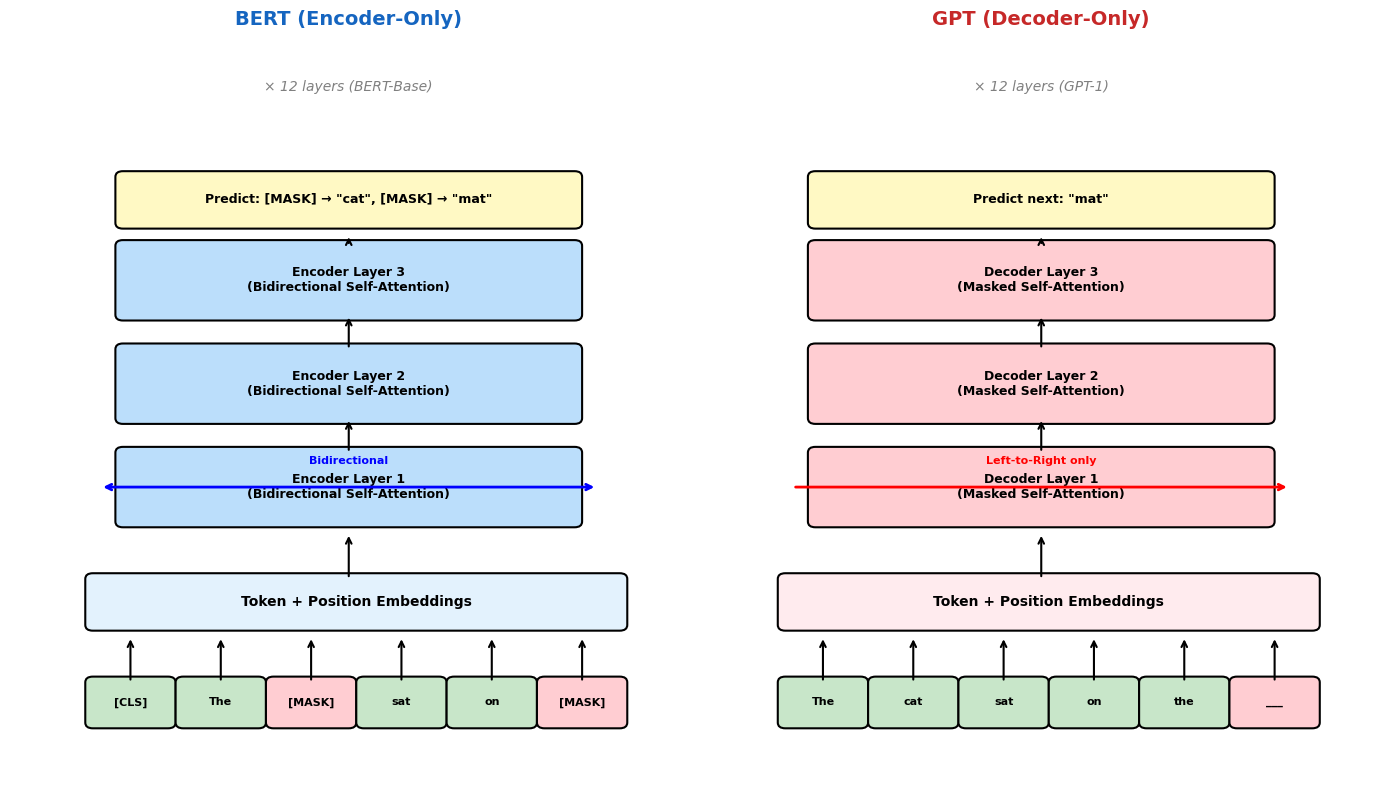

Figure saved: plot09_bert_vs_gpt.png


In [14]:
# ============================================================
# PLOT 9: BERT vs GPT Architecture Comparison
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# ---- BERT (Encoder-only) ----
ax = axes[0]
ax.set_xlim(-1, 8)
ax.set_ylim(-1, 12)
ax.set_title('BERT (Encoder-Only)', fontsize=14, fontweight='bold', color='#1565C0')
ax.axis('off')

# Input tokens
bert_tokens = ['[CLS]', 'The', '[MASK]', 'sat', 'on', '[MASK]']
for i, tok in enumerate(bert_tokens):
    color = '#FFCDD2' if '[MASK]' in tok else '#C8E6C9'
    draw_block(ax, i * 1.2 + 0.1, 0, 1, 0.7, tok, color, fontsize=8)

# Arrows up
for i in range(len(bert_tokens)):
    draw_arrow(ax, i * 1.2 + 0.6, 0.7, i * 1.2 + 0.6, 1.5)

# Embedding layer
draw_block(ax, 0.1, 1.7, 7, 0.8, 'Token + Position Embeddings', '#E3F2FD', fontsize=10)
draw_arrow(ax, 3.5, 2.5, 3.5, 3.3)

# Encoder layers (show bidirectional arrows)
for layer_idx in range(3):
    y = 3.5 + layer_idx * 1.8
    draw_block(ax, 0.5, y, 6, 1.2,
               f'Encoder Layer {layer_idx + 1}\n(Bidirectional Self-Attention)',
               '#BBDEFB', fontsize=9)
    if layer_idx < 2:
        draw_arrow(ax, 3.5, y + 1.2, 3.5, y + 1.8)

# Bidirectional arrows annotation
ax.annotate('', xy=(6.8, 4.1), xytext=(0.2, 4.1),
            arrowprops=dict(arrowstyle='<->', color='blue', linewidth=2))
ax.text(3.5, 4.5, 'Bidirectional', fontsize=8, color='blue',
        ha='center', fontweight='bold')

# Output
y_out = 3.5 + 2 * 1.8 + 1.4
draw_arrow(ax, 3.5, 3.5 + 2 * 1.8 + 1.2, 3.5, y_out)
draw_block(ax, 0.5, y_out + 0.2, 6, 0.8, 'Predict: [MASK] → "cat", [MASK] → "mat"', '#FFF9C4', fontsize=9)

ax.text(3.5, 11, '× 12 layers (BERT-Base)', fontsize=10, fontstyle='italic',
        ha='center', color='gray')


# ---- GPT (Decoder-only) ----
ax = axes[1]
ax.set_xlim(-1, 8)
ax.set_ylim(-1, 12)
ax.set_title('GPT (Decoder-Only)', fontsize=14, fontweight='bold', color='#C62828')
ax.axis('off')

# Input tokens
gpt_tokens = ['The', 'cat', 'sat', 'on', 'the', '___']
for i, tok in enumerate(gpt_tokens):
    color = '#FFCDD2' if tok == '___' else '#C8E6C9'
    draw_block(ax, i * 1.2 + 0.1, 0, 1, 0.7, tok, color, fontsize=8)

# Arrows up
for i in range(len(gpt_tokens)):
    draw_arrow(ax, i * 1.2 + 0.6, 0.7, i * 1.2 + 0.6, 1.5)

# Embedding layer
draw_block(ax, 0.1, 1.7, 7, 0.8, 'Token + Position Embeddings', '#FFEBEE', fontsize=10)
draw_arrow(ax, 3.5, 2.5, 3.5, 3.3)

# Decoder layers (show left-to-right arrows)
for layer_idx in range(3):
    y = 3.5 + layer_idx * 1.8
    draw_block(ax, 0.5, y, 6, 1.2,
               f'Decoder Layer {layer_idx + 1}\n(Masked Self-Attention)',
               '#FFCDD2', fontsize=9)
    if layer_idx < 2:
        draw_arrow(ax, 3.5, y + 1.2, 3.5, y + 1.8)

# Left-to-right arrow annotation
ax.annotate('', xy=(6.8, 4.1), xytext=(0.2, 4.1),
            arrowprops=dict(arrowstyle='->', color='red', linewidth=2))
ax.text(3.5, 4.5, 'Left-to-Right only', fontsize=8, color='red',
        ha='center', fontweight='bold')

# Output
y_out = 3.5 + 2 * 1.8 + 1.4
draw_arrow(ax, 3.5, 3.5 + 2 * 1.8 + 1.2, 3.5, y_out)
draw_block(ax, 0.5, y_out + 0.2, 6, 0.8, 'Predict next: "mat"', '#FFF9C4', fontsize=9)

ax.text(3.5, 11, '× 12 layers (GPT-1)', fontsize=10, fontstyle='italic',
        ha='center', color='gray')

plt.tight_layout()
plt.savefig(SAVE_DIR + 'plot09_bert_vs_gpt.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: plot09_bert_vs_gpt.png")

---
### BERT vs GPT — Detailed Comparison

| Feature | BERT | GPT |
|---------|------|-----|
| **Architecture** | Encoder-only | Decoder-only |
| **Attention** | Bidirectional (sees all tokens) | Causal / left-to-right (sees only past) |
| **Pre-training** | Masked Language Model + NSP | Next Token Prediction |
| **Best For** | Understanding tasks (classification, NER, QA) | Generation tasks (text, code, chat) |
| **Output** | Contextual embeddings for each token | One token at a time (autoregressive) |
| **Parameters (base)** | 110M | 117M (GPT-1) |
| **Year** | 2018 | 2018 |
| **Creator** | Google | OpenAI |

---
## 4.7 Code Demo — Simple Next-Word Prediction

Let us build a very basic "language model" using numpy. It will learn
simple bigram (two-word) probabilities from a tiny corpus.

In [15]:
# ============================================================
# CODE DEMO 5: Simple Next-Word Prediction (Bigram Model)
# ============================================================
# A bigram model predicts the next word based on ONLY the current word.
# P(next_word | current_word) = count(current_word, next_word) / count(current_word)

# Our tiny training corpus
corpus = [
    "the cat sat on the mat",
    "the dog sat on the rug",
    "the cat ate the fish",
    "the dog ate the bone",
    "a cat sat on a mat",
    "the bird flew over the tree",
]

# Step 1: Build bigram counts
# bigram_counts[word_a][word_b] = number of times word_b follows word_a
bigram_counts = {}
total_following = {}  # how many times each word appears as first in a bigram

for sentence in corpus:
    words = sentence.split()
    for i in range(len(words) - 1):
        w1, w2 = words[i], words[i+1]
        if w1 not in bigram_counts:
            bigram_counts[w1] = {}
            total_following[w1] = 0
        bigram_counts[w1][w2] = bigram_counts[w1].get(w2, 0) + 1
        total_following[w1] += 1

# Step 2: Convert counts to probabilities
bigram_probs = {}
for w1 in bigram_counts:
    bigram_probs[w1] = {}
    for w2 in bigram_counts[w1]:
        bigram_probs[w1][w2] = bigram_counts[w1][w2] / total_following[w1]

# Step 3: Show probabilities for some words
print("=== Bigram Probabilities ===\n")
for word in ['the', 'cat', 'sat', 'dog']:
    if word in bigram_probs:
        print(f'After "{word}":')
        # Sort by probability
        sorted_next = sorted(bigram_probs[word].items(), key=lambda x: -x[1])
        for next_word, prob in sorted_next:
            bar = '#' * int(prob * 30)
            print(f'  → "{next_word}": {prob:.2f}  {bar}')
        print()

# Step 4: Generate text using the bigram model
def generate_text(start_word, length=8):
    '''Generate text by sampling from bigram probabilities.'''
    result = [start_word]
    current = start_word
    for _ in range(length - 1):
        if current not in bigram_probs:
            break
        # Get possible next words and their probabilities
        next_words = list(bigram_probs[current].keys())
        probs = np.array([bigram_probs[current][w] for w in next_words])
        # Sample according to probabilities
        chosen = np.random.choice(next_words, p=probs)
        result.append(chosen)
        current = chosen
    return ' '.join(result)

print("=== Generated Text (Bigram Model) ===\n")
np.random.seed(42)
for i in range(5):
    text = generate_text('the', length=8)
    print(f"  {i+1}. {text}")

print("\nNote: This is a VERY simple model. Real LLMs use transformers with")
print("billions of parameters to capture much more complex patterns.")

=== Bigram Probabilities ===

After "the":
  → "cat": 0.20  ######
  → "dog": 0.20  ######
  → "mat": 0.10  ###
  → "rug": 0.10  ###
  → "fish": 0.10  ###
  → "bone": 0.10  ###
  → "bird": 0.10  ###
  → "tree": 0.10  ###

After "cat":
  → "sat": 0.67  ####################
  → "ate": 0.33  ##########

After "sat":
  → "on": 1.00  ##############################

After "dog":
  → "sat": 0.50  ###############
  → "ate": 0.50  ###############

=== Generated Text (Bigram Model) ===

  1. the dog ate the rug
  2. the cat sat on a mat
  3. the bone
  4. the cat ate the mat
  5. the cat sat on the dog sat on

Note: This is a VERY simple model. Real LLMs use transformers with
billions of parameters to capture much more complex patterns.


---
# Part 5 — Training Paradigms (Slides 19-22)

## 5.1 Self-Supervised vs Supervised Learning (Slide 21)

| Feature | Supervised Learning | Self-Supervised Learning |
|---------|-------------------|------------------------|
| **Labels** | Requires human-labeled data | Labels come from the data itself |
| **Cost** | Expensive (human annotators) | Cheap (automated from raw data) |
| **Scale** | Limited by labeling budget | Scales to internet-sized data |
| **Example** | "This review is positive" (human label) | "The ___ sat on the mat" (mask a word) |
| **Used By** | Traditional ML, fine-tuning | Pre-training LLMs |

### Self-Supervised Learning Examples

| Task | Input | Self-Generated Label |
|------|-------|---------------------|
| **Next Word Prediction** (GPT) | "The cat sat on" | "the" (next word in text) |
| **Masked Language Model** (BERT) | "The [MASK] sat on the mat" | "cat" (original word) |
| **Image Reconstruction** | Image with patches removed | Original image |
| **Contrastive Learning** (CLIP) | Image + text pair | Match or not-match |

### Pretraining + Fine-tuning Pipeline — ASCII Diagram

```
  ┌───────────────────────────────────────────────────────────────┐
  │                    STAGE 1: PRE-TRAINING                      │
  │                                                               │
  │   Massive Unlabeled Data    Self-Supervised    Base Model     │
  │   (Wikipedia, Books,   ───→  Learning      ───→ (general     │
  │    Internet text)            (predict next       knowledge)   │
  │                               word / fill                     │
  │                               masks)                          │
  └───────────────────────────────────────────────────────────────┘
                                    │
                                    ▼
  ┌───────────────────────────────────────────────────────────────┐
  │                    STAGE 2: FINE-TUNING                       │
  │                                                               │
  │   Small Labeled Data    Supervised         Specialist Model   │
  │   (1000 examples    ───→ Learning      ───→ (e.g., sentiment  │
  │    of sentiment)         (train on           classifier)      │
  │                           labeled data)                       │
  └───────────────────────────────────────────────────────────────┘
```

In [16]:
# ============================================================
# CODE DEMO 6: Self-Supervised Learning — Mask and Predict
# ============================================================
# We demonstrate the CONCEPT of masked language modeling (like BERT).
# Given a sentence with one word masked, we try to predict the masked word
# using simple word co-occurrence statistics.

# Training data (our "pre-training corpus")
training_corpus = [
    "the cat sat on the mat",
    "the dog sat on the rug",
    "the cat ate the fish",
    "the dog ate the bone",
    "a cat played with the ball",
    "a dog played with the toy",
    "the bird flew over the tree",
    "the cat chased the mouse",
    "the dog chased the cat",
]

# Build co-occurrence matrix: how often does word_a appear near word_b?
# (within a window of 2 words)
all_words_set = set()
for sent in training_corpus:
    all_words_set.update(sent.split())

word_list = sorted(all_words_set)
word_to_idx = {w: i for i, w in enumerate(word_list)}
n_words = len(word_list)
co_occurrence = np.zeros((n_words, n_words))

window_size = 2
for sent in training_corpus:
    words = sent.split()
    for i, w in enumerate(words):
        for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
            if i != j:
                co_occurrence[word_to_idx[w], word_to_idx[words[j]]] += 1

# Now simulate "masked language modeling"
def predict_masked_word(sentence_with_mask):
    '''
    Given a sentence like "the [MASK] sat on the mat",
    predict the masked word using co-occurrence statistics.
    '''
    words = sentence_with_mask.split()
    mask_idx = words.index('[MASK]')

    # Get context words (neighbors of the mask)
    context_words = []
    for i in range(max(0, mask_idx - window_size), min(len(words), mask_idx + window_size + 1)):
        if i != mask_idx and words[i] != '[MASK]' and words[i] in word_to_idx:
            context_words.append(words[i])

    # Score each candidate word by its co-occurrence with context
    scores = np.zeros(n_words)
    for ctx_word in context_words:
        scores += co_occurrence[:, word_to_idx[ctx_word]]

    # Get top predictions
    top_indices = np.argsort(scores)[::-1][:5]
    predictions = [(word_list[idx], scores[idx]) for idx in top_indices if scores[idx] > 0]
    return predictions

# Test it!
test_sentences = [
    "the [MASK] sat on the mat",
    "the dog [MASK] the bone",
    "a [MASK] played with the ball",
]

print("=== Self-Supervised Learning Demo: Masked Word Prediction ===\n")
for sent in test_sentences:
    print(f"Sentence: {sent}")
    predictions = predict_masked_word(sent)
    print(f"Top predictions:")
    for word, score in predictions[:3]:
        print(f"  → '{word}' (score: {score:.0f})")
    print()

print("This is similar to how BERT learns during pre-training!")
print("BERT uses transformer attention instead of simple co-occurrence,")
print("but the IDEA is the same: mask a word and learn to predict it.")

=== Self-Supervised Learning Demo: Masked Word Prediction ===

Sentence: the [MASK] sat on the mat
Top predictions:
  → 'cat' (score: 8)
  → 'dog' (score: 7)
  → 'sat' (score: 6)

Sentence: the dog [MASK] the bone
Top predictions:
  → 'cat' (score: 12)
  → 'dog' (score: 10)
  → 'ate' (score: 10)

Sentence: a [MASK] played with the ball
Top predictions:
  → 'the' (score: 4)
  → 'played' (score: 4)
  → 'dog' (score: 3)

This is similar to how BERT learns during pre-training!
BERT uses transformer attention instead of simple co-occurrence,
but the IDEA is the same: mask a word and learn to predict it.


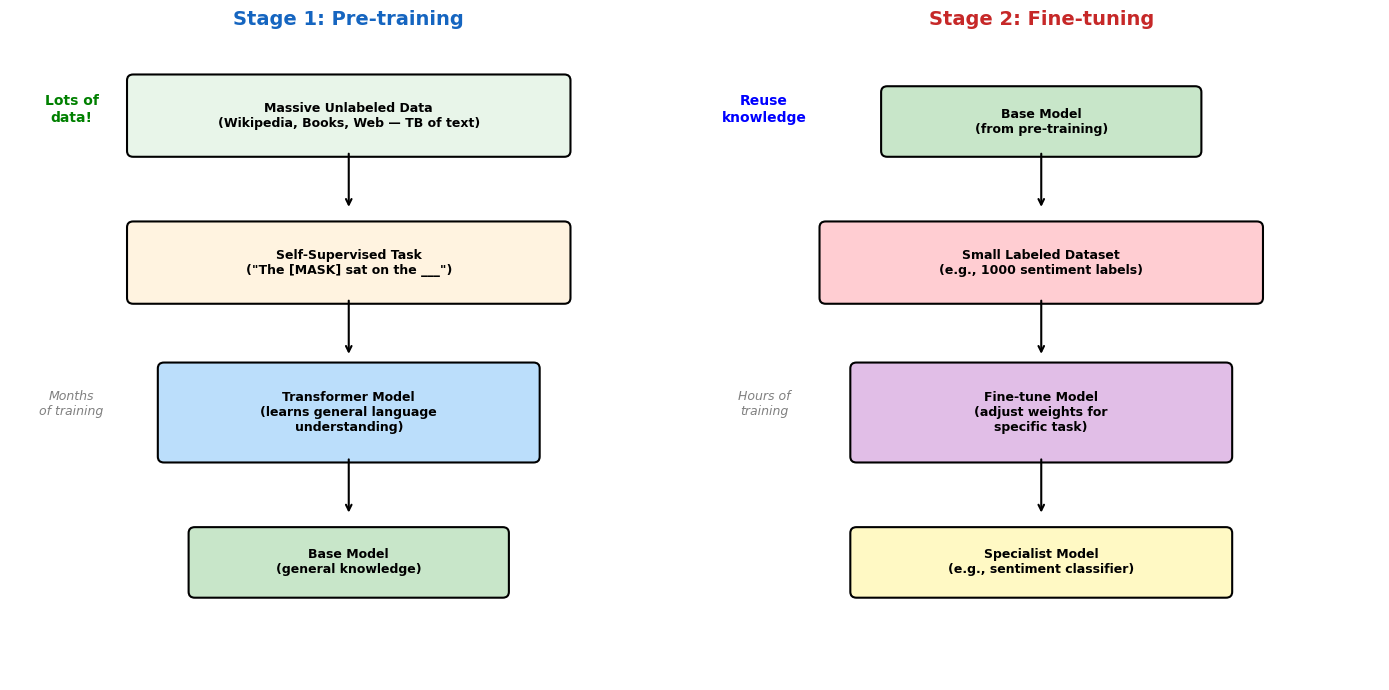

Figure saved: plot10_pretrain_vs_finetune.png


In [17]:
# ============================================================
# PLOT 10: Pretraining vs Fine-tuning Data Flow
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# ---- LEFT: Pre-training ----
ax = axes[0]
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.set_title('Stage 1: Pre-training', fontsize=14, fontweight='bold', color='#1565C0')
ax.axis('off')

# Large data
draw_block(ax, 1, 8, 7, 1.2, 'Massive Unlabeled Data\n(Wikipedia, Books, Web — TB of text)', '#E8F5E9')
draw_arrow(ax, 4.5, 8, 4.5, 7)

# Self-supervised label
draw_block(ax, 1, 5.5, 7, 1.2, 'Self-Supervised Task\n("The [MASK] sat on the ___")', '#FFF3E0')
draw_arrow(ax, 4.5, 5.5, 4.5, 4.5)

# Model
draw_block(ax, 1.5, 2.8, 6, 1.5, 'Transformer Model\n(learns general language\nunderstanding)', '#BBDEFB')
draw_arrow(ax, 4.5, 2.8, 4.5, 1.8)

# Output
draw_block(ax, 2, 0.5, 5, 1, 'Base Model\n(general knowledge)', '#C8E6C9')

# Labels
ax.text(0, 8.5, 'Lots of\ndata!', fontsize=10, fontweight='bold', color='green',
        ha='center')
ax.text(0, 3.5, 'Months\nof training', fontsize=9, fontstyle='italic', color='gray',
        ha='center')

# ---- RIGHT: Fine-tuning ----
ax = axes[1]
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.set_title('Stage 2: Fine-tuning', fontsize=14, fontweight='bold', color='#C62828')
ax.axis('off')

# Base model (input)
draw_block(ax, 2, 8, 5, 1, 'Base Model\n(from pre-training)', '#C8E6C9')
draw_arrow(ax, 4.5, 8, 4.5, 7)

# Small labeled data
draw_block(ax, 1, 5.5, 7, 1.2, 'Small Labeled Dataset\n(e.g., 1000 sentiment labels)', '#FFCDD2')
draw_arrow(ax, 4.5, 5.5, 4.5, 4.5)

# Fine-tune
draw_block(ax, 1.5, 2.8, 6, 1.5, 'Fine-tune Model\n(adjust weights for\nspecific task)', '#E1BEE7')
draw_arrow(ax, 4.5, 2.8, 4.5, 1.8)

# Output
draw_block(ax, 1.5, 0.5, 6, 1, 'Specialist Model\n(e.g., sentiment classifier)', '#FFF9C4')

# Labels
ax.text(0, 8.5, 'Reuse\nknowledge', fontsize=10, fontweight='bold', color='blue',
        ha='center')
ax.text(0, 3.5, 'Hours of\ntraining', fontsize=9, fontstyle='italic', color='gray',
        ha='center')

plt.tight_layout()
plt.savefig(SAVE_DIR + 'plot10_pretrain_vs_finetune.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: plot10_pretrain_vs_finetune.png")

---
## 5.2 Adapting LLMs for Tasks (Slide 22)

Once you have a pre-trained LLM, there are several ways to adapt it:

| Technique | Description | When to Use |
|-----------|-------------|------------|
| **Full Fine-tuning** | Update ALL parameters | Small model, lots of task data |
| **Parameter Freezing** | Freeze most layers, train last few | Medium model, moderate data |
| **Adapters** | Add small trainable modules | Large model, limited data |
| **LoRA** | Low-rank adaptation of weights | Very large models |
| **Prompt Tuning** | Learn soft prompt embeddings | When you cannot modify the model |

### Practical Challenges

| Challenge | Description | Mitigation |
|-----------|-------------|-----------|
| **Overfitting** | Model memorizes training data | Regularization, early stopping |
| **Dataset Quality** | Noisy or biased labels | Data cleaning, validation |
| **Catastrophic Forgetting** | Model forgets pre-trained knowledge | Lower learning rate, gradual unfreezing |
| **Compute Cost** | Fine-tuning large models is expensive | Use parameter-efficient methods |

---
# Part 6 — Prompt Engineering & In-Context Learning (Slides 23-24)

## 6.1 Crafting Effective Prompts (Slide 23)

**Prompt Engineering** is the art of designing input text to get the best
possible output from an LLM — without changing the model itself.

### Bad vs Good Prompt Comparison

| | Bad Prompt | Good Prompt |
|---|-----------|------------|
| **Example 1** | "Tell me about that war with Napoleon" | "Detail the diplomatic tensions that led to Napoleon's conflict in the Battle of Waterloo" |
| **Why** | Vague — which war? What aspect? | Specific — names the event, asks for a particular angle |
| **Example 2** | "Write code" | "Write a Python function that takes a list of integers and returns the two numbers that sum to a target value" |
| **Why** | No context, no constraints | Clear task, language, input/output specification |
| **Example 3** | "Summarize this" | "Summarize the following article in 3 bullet points, focusing on the economic impact" |
| **Why** | No format, no focus | Specifies format (bullets), count (3), and focus (economic) |

### Prompt Engineering Tips Table

| Tip | Description | Example |
|-----|-------------|---------|
| **Be Specific** | Include details about what you want | "List 5 causes of WWI" vs "Tell me about WWI" |
| **Set the Role** | Tell the model who to be | "You are an expert historian..." |
| **Provide Format** | Specify output structure | "Answer in a numbered list" |
| **Give Examples** | Show what good output looks like | "Like this: Q: ... A: ..." |
| **Add Constraints** | Set boundaries | "In under 100 words" |
| **Chain of Thought** | Ask to reason step by step | "Think step by step..." |

---
## 6.2 In-Context Learning & Few-Shot Examples (Slide 24)

**In-Context Learning (ICL)** means the model learns the task from examples
provided in the prompt, without updating its weights.

| Type | # Examples | Description |
|------|-----------|-------------|
| **Zero-shot** | 0 | Just describe the task |
| **One-shot** | 1 | Give one example |
| **Few-shot** | 2-10 | Give a few examples |

### Few-Shot Sentiment Classification Example

```
Classify the sentiment of the following review.

Review: "The food was delicious and the service was excellent!"
Sentiment: Positive

Review: "The movie was okay, nothing special."
Sentiment: Neutral

Review: "Terrible experience. The product broke after one day."
Sentiment: Negative

Review: "I absolutely love this new phone! Best purchase ever."
Sentiment: ???

(The model should predict: Positive)
```

### Few-Shot Topic Classification Example

```
Classify the topic of the following headline.

Headline: "S&P 500 reaches all-time high amid tech rally"
Topic: Finance

Headline: "Lakers defeat Celtics in overtime thriller"
Topic: Sports

Headline: "Apple unveils new AI-powered chip at WWDC"
Topic: Technology

Headline: "Bitcoin surges past $100,000 milestone"
Topic: ???

(The model should predict: Finance)
```

In [18]:
# ============================================================
# CODE DEMO 7: Simple Few-Shot Classification
# ============================================================
# We demonstrate few-shot classification using cosine similarity
# between word embeddings. This shows the CONCEPT of how a model
# uses examples to classify new inputs.

# Step 1: Create a simple bag-of-words embedding
def sentence_embedding(sentence, embed_matrix, vocabulary):
    '''
    Create a sentence embedding by averaging word embeddings.
    This is a simple approach; real models use transformers.
    '''
    words = sentence.lower().split()
    embeddings = []
    for word in words:
        if word in vocabulary:
            idx = vocabulary[word]
            embeddings.append(embed_matrix[idx])
    if len(embeddings) == 0:
        return np.zeros(embed_matrix.shape[1])
    return np.mean(embeddings, axis=0)

# Step 2: Build a larger vocabulary and embedding matrix
all_text = [
    # Positive reviews
    "great amazing wonderful fantastic excellent love",
    "delicious perfect beautiful outstanding brilliant",
    # Negative reviews
    "terrible awful horrible bad worst hate",
    "boring disappointing poor broken useless ugly",
    # Neutral
    "okay average normal standard typical medium",
    # Common words
    "the a an is was were it this that and or but",
    "food movie product service experience phone book",
]

# Build vocab
big_vocab = {}
for text in all_text:
    for word in text.split():
        if word not in big_vocab:
            big_vocab[word] = len(big_vocab)

n_vocab = len(big_vocab)
emb_dim = 16
np.random.seed(123)
big_embeddings = np.random.randn(n_vocab, emb_dim) * 0.3

# Make positive words similar to each other
pos_words = "great amazing wonderful fantastic excellent love delicious perfect beautiful outstanding brilliant".split()
pos_base = np.random.randn(emb_dim) * 0.5
for w in pos_words:
    if w in big_vocab:
        big_embeddings[big_vocab[w]] = pos_base + np.random.randn(emb_dim) * 0.1

# Make negative words similar to each other (and different from positive)
neg_words = "terrible awful horrible bad worst hate boring disappointing poor broken useless ugly".split()
neg_base = -pos_base + np.random.randn(emb_dim) * 0.2
for w in neg_words:
    if w in big_vocab:
        big_embeddings[big_vocab[w]] = neg_base + np.random.randn(emb_dim) * 0.1

# Step 3: Few-shot examples
few_shot_examples = [
    ("the food was great and the service was amazing", "Positive"),
    ("terrible experience the product was awful", "Negative"),
    ("it was okay nothing special", "Neutral"),
    ("absolutely love this wonderful product", "Positive"),
    ("horrible and disappointing waste", "Negative"),
]

# Step 4: Classify new sentences
def few_shot_classify(new_sentence, examples, embed_matrix, vocabulary):
    '''Classify by finding the most similar example.'''
    new_emb = sentence_embedding(new_sentence, embed_matrix, vocabulary)

    best_sim = -2
    best_label = "Unknown"
    similarities = []

    for ex_sent, ex_label in examples:
        ex_emb = sentence_embedding(ex_sent, embed_matrix, vocabulary)
        sim = cosine_similarity(new_emb, ex_emb)
        similarities.append((ex_sent[:40], ex_label, sim))
        if sim > best_sim:
            best_sim = sim
            best_label = ex_label

    return best_label, best_sim, similarities

# Step 5: Test on new sentences
test_sentences = [
    "this product is fantastic and wonderful",
    "the movie was terrible and boring",
    "it was a normal average experience",
    "I love this amazing beautiful phone",
]

print("=== Few-Shot Classification Demo ===\n")
for sent in test_sentences:
    label, confidence, sims = few_shot_classify(sent, few_shot_examples, big_embeddings, big_vocab)
    print(f"Input:      '{sent}'")
    print(f"Predicted:  {label} (similarity: {confidence:.3f})")
    print(f"  Comparisons:")
    for ex_text, ex_label, sim in sims:
        print(f"    vs [{ex_label:>8}] '{ex_text}...' → sim={sim:.3f}")
    print()

=== Few-Shot Classification Demo ===

Input:      'this product is fantastic and wonderful'
Predicted:  Positive (similarity: 0.958)
  Comparisons:
    vs [Positive] 'the food was great and the service was a...' → sim=0.606
    vs [Negative] 'terrible experience the product was awfu...' → sim=-0.855
    vs [ Neutral] 'it was okay nothing special...' → sim=-0.318
    vs [Positive] 'absolutely love this wonderful product...' → sim=0.958
    vs [Negative] 'horrible and disappointing waste...' → sim=-0.770

Input:      'the movie was terrible and boring'
Predicted:  Negative (similarity: 0.899)
  Comparisons:
    vs [Positive] 'the food was great and the service was a...' → sim=-0.446
    vs [Negative] 'terrible experience the product was awfu...' → sim=0.899
    vs [ Neutral] 'it was okay nothing special...' → sim=0.325
    vs [Positive] 'absolutely love this wonderful product...' → sim=-0.826
    vs [Negative] 'horrible and disappointing waste...' → sim=0.858

Input:      'it was a norma

---
# Part 7 — Challenges & Future (Slides 25-27)

## 7.1 Challenges in LLM Deployment (Slide 25)

| Challenge | Description | Real-World Example |
|-----------|-------------|-------------------|
| **Bias** | Models reflect biases in training data | Stereotyping in generated text |
| **Harmful Content** | Can generate toxic or dangerous text | Misinformation, instructions for harm |
| **Fairness** | Unequal performance across demographics | Better at English than other languages |
| **Transparency** | Hard to explain why model made a choice | "Black box" problem |
| **Hallucination** | Models confidently state false information | Making up fake citations |
| **Cost** | Running large models is expensive | GPT-4 API costs per query |

### Strategies for Mitigating LLM Bias

| Strategy | Description |
|----------|-------------|
| **Data Curation** | Carefully select and balance training data |
| **Model Fine-tuning** | RLHF (Reinforcement Learning from Human Feedback) |
| **Multiple Evaluation Metrics** | Test across different demographics and tasks |
| **Red Teaming** | Deliberately try to make the model fail |
| **Logic in Addressing Bias** | Systematic approach to identifying and fixing biases |

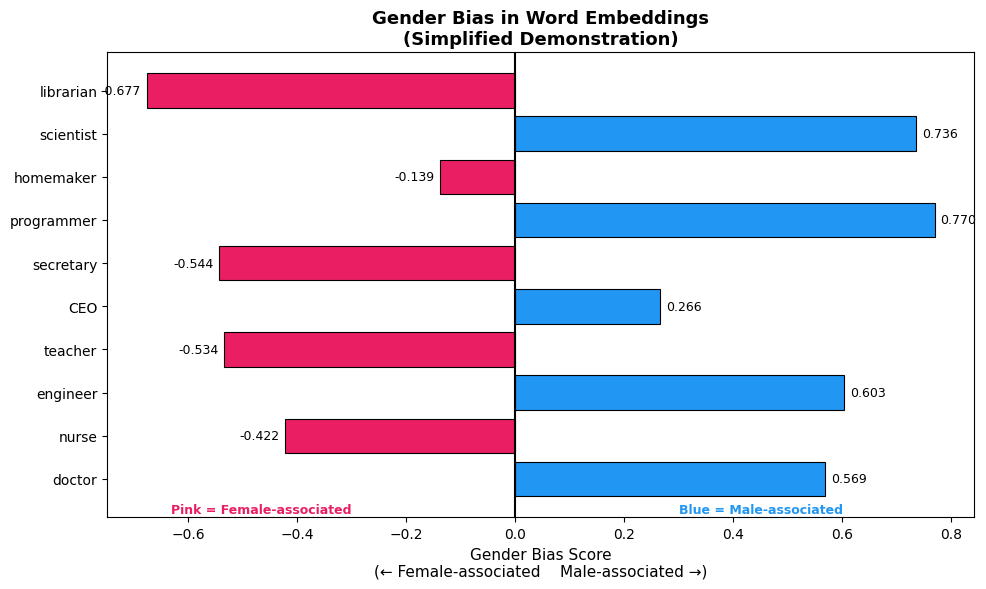


Figure saved: plot11_bias_detection.png

Key takeaway: Word embeddings can encode societal stereotypes.
This is why bias detection and mitigation are critical for LLM deployment.


In [19]:
# ============================================================
# CODE DEMO 8 + PLOT 11: Bias Detection in Word Embeddings
# ============================================================
# Word embeddings can encode societal biases present in training data.
# We demonstrate this with a simplified example.

np.random.seed(42)

# Create embeddings that reflect common biases found in real models
emb_dim_bias = 50
words_bias = ['doctor', 'nurse', 'engineer', 'teacher', 'CEO', 'secretary',
              'programmer', 'homemaker', 'scientist', 'librarian',
              'man', 'woman', 'he', 'she', 'male', 'female']

# Create random embeddings
bias_embeddings = {}
for w in words_bias:
    bias_embeddings[w] = np.random.randn(emb_dim_bias) * 0.3

# Inject gender bias (simplified demonstration):
# Make "male" professions closer to "he/man" and "female" professions closer to "she/woman"
gender_direction = np.random.randn(emb_dim_bias) * 0.5  # represents "gender axis"

# Add bias: stereotypically "male" professions get positive gender direction
male_stereotypes = ['doctor', 'engineer', 'CEO', 'programmer', 'scientist']
female_stereotypes = ['nurse', 'teacher', 'secretary', 'homemaker', 'librarian']

for w in male_stereotypes:
    bias_embeddings[w] += gender_direction * 0.3
for w in female_stereotypes:
    bias_embeddings[w] -= gender_direction * 0.3

bias_embeddings['man'] += gender_direction * 0.5
bias_embeddings['he'] += gender_direction * 0.5
bias_embeddings['male'] += gender_direction * 0.5
bias_embeddings['woman'] -= gender_direction * 0.5
bias_embeddings['she'] -= gender_direction * 0.5
bias_embeddings['female'] -= gender_direction * 0.5

# Measure bias: cosine similarity of each profession to "he" vs "she"
professions = ['doctor', 'nurse', 'engineer', 'teacher', 'CEO',
               'secretary', 'programmer', 'homemaker', 'scientist', 'librarian']

he_emb = bias_embeddings['he']
she_emb = bias_embeddings['she']

bias_scores = []
for prof in professions:
    prof_emb = bias_embeddings[prof]
    sim_he = np.dot(prof_emb, he_emb) / (np.linalg.norm(prof_emb) * np.linalg.norm(he_emb))
    sim_she = np.dot(prof_emb, she_emb) / (np.linalg.norm(prof_emb) * np.linalg.norm(she_emb))
    bias_scores.append(sim_he - sim_she)  # positive = male-biased, negative = female-biased

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
colors_bias = ['#2196F3' if score > 0 else '#E91E63' for score in bias_scores]
bars = ax.barh(professions, bias_scores, color=colors_bias, edgecolor='black', linewidth=0.8)

# Add a center line
ax.axvline(x=0, color='black', linewidth=1.5, linestyle='-')

# Labels
ax.set_xlabel('Gender Bias Score\n(← Female-associated    Male-associated →)', fontsize=11)
ax.set_title('Gender Bias in Word Embeddings\n(Simplified Demonstration)', fontsize=13, fontweight='bold')

# Add value labels
for bar, score in zip(bars, bias_scores):
    x_pos = score + 0.01 if score > 0 else score - 0.01
    ha = 'left' if score > 0 else 'right'
    ax.text(x_pos, bar.get_y() + bar.get_height()/2,
            f'{score:.3f}', va='center', ha=ha, fontsize=9)

# Legend
ax.text(0.3, -0.8, 'Blue = Male-associated', fontsize=9, color='#2196F3', fontweight='bold')
ax.text(-0.3, -0.8, 'Pink = Female-associated', fontsize=9, color='#E91E63',
        fontweight='bold', ha='right')

plt.tight_layout()
plt.savefig(SAVE_DIR + 'plot11_bias_detection.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved: plot11_bias_detection.png")
print("\nKey takeaway: Word embeddings can encode societal stereotypes.")
print("This is why bias detection and mitigation are critical for LLM deployment.")

---
## 7.2 Safeguarding Data in LLMs (Slide 26)

LLMs can **memorize** parts of their training data, which raises privacy concerns.

| Risk | Description | Example |
|------|-------------|---------|
| **Memorization** | Model stores and can regurgitate training data | Outputting someone's phone number |
| **Data Extraction** | Adversaries can extract private info | Prompting model to reveal training data |
| **PII Leakage** | Personally identifiable information in outputs | Names, addresses, SSNs |

### De-memorization Techniques

| Technique | How It Works |
|-----------|-------------|
| **Differential Privacy** | Add noise during training to prevent memorization |
| **Data Deduplication** | Remove duplicate entries from training data |
| **Output Filtering** | Filter model outputs for PII before returning |
| **Federated Learning** | Train on distributed data without centralizing it |
| **Unlearning** | Selectively remove specific data from the model |

---
## 7.3 What's Next for LLMs? (Slide 27)

### Emerging Trends

| Trend | Description | Examples |
|-------|-------------|---------|
| **Multimodal Models** | Handle text + images + audio + video | GPT-4V, Gemini |
| **Smaller Efficient Models** | Powerful but compact | Phi-2, Mistral, LLaMA-2 |
| **On-device AI** | Run LLMs on phones/laptops | Apple Intelligence, Gemini Nano |
| **Agents** | LLMs that can take actions | AutoGPT, tool-using LLMs |
| **RAG** | Retrieval-Augmented Generation | Ground outputs in real data |

### Open Research Directions

| Area | Key Questions |
|------|--------------|
| **Model Architecture & Efficiency** | Can we make transformers faster? Alternatives to attention? |
| **Training Paradigms** | Better self-supervised objectives? More efficient training? |
| **Data & Generalization** | How to train on less data? Better out-of-distribution performance? |
| **Ethics & Bias** | How to make models fair? How to prevent misuse? |
| **Privacy & Security** | How to prevent data leakage? Secure inference? |

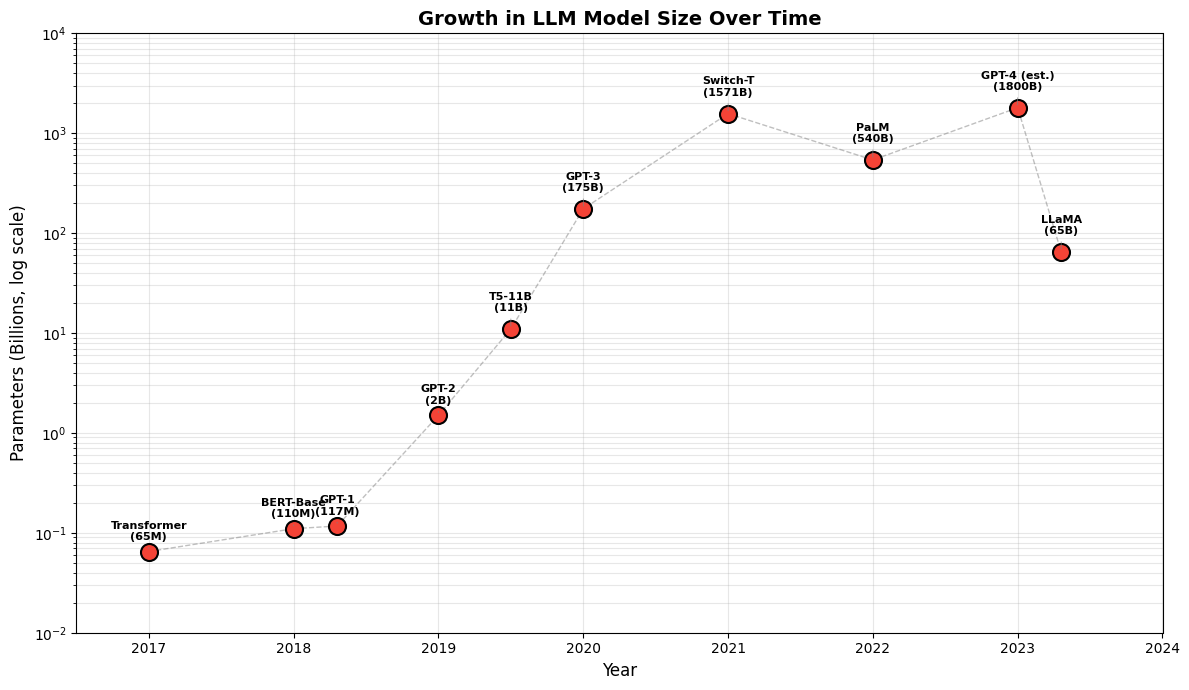

Figure saved: plot12_model_size_growth.png


In [20]:
# ============================================================
# PLOT 12: Model Size Growth Over Time
# ============================================================
fig, ax = plt.subplots(figsize=(12, 7))

# Historical model sizes (parameters in billions)
models_timeline = [
    (2017, 'Transformer', 0.065),
    (2018, 'BERT-Base', 0.11),
    (2018.3, 'GPT-1', 0.117),
    (2019, 'GPT-2', 1.5),
    (2019.5, 'T5-11B', 11),
    (2020, 'GPT-3', 175),
    (2021, 'Switch-T', 1571),
    (2022, 'PaLM', 540),
    (2023, 'GPT-4 (est.)', 1800),
    (2023.3, 'LLaMA', 65),
]

years_t = [m[0] for m in models_timeline]
names_t = [m[1] for m in models_timeline]
sizes_t = [m[2] for m in models_timeline]

# Plot on log scale
ax.scatter(years_t, sizes_t, s=150, c='#F44336', edgecolors='black',
           linewidth=1.5, zorder=3)

# Connect with a line (sort by year first)
sorted_data = sorted(zip(years_t, sizes_t))
ax.plot([d[0] for d in sorted_data], [d[1] for d in sorted_data],
        'gray', linewidth=1, alpha=0.5, linestyle='--', zorder=2)

# Label each point
for yr, name, size in models_timeline:
    label = f'{name}\n({size:.0f}B)' if size >= 1 else f'{name}\n({size*1000:.0f}M)'
    offset_y = 1.5 if size > 10 else 1.3
    ax.annotate(label, xy=(yr, size), xytext=(yr, size * offset_y),
                fontsize=8, ha='center', fontweight='bold',
                arrowprops=dict(arrowstyle='-', color='gray', linewidth=0.5))

ax.set_yscale('log')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Parameters (Billions, log scale)', fontsize=12)
ax.set_title('Growth in LLM Model Size Over Time', fontsize=14, fontweight='bold')
ax.set_xlim(2016.5, 2024)
ax.grid(True, alpha=0.3, which='both')
ax.set_ylim(0.01, 10000)

plt.tight_layout()
plt.savefig(SAVE_DIR + 'plot12_model_size_growth.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: plot12_model_size_growth.png")

---
# Part 8 — Course Projects & Wrap-up (Slides 28-30)

## 8.1 Course Project Ideas (Slides 28-29)

| # | Project | Description | Key Skills |
|---|---------|-------------|-----------|
| 1 | **Sentiment Analysis with BERT** | Fine-tune BERT for movie/product review classification | Transfer learning, fine-tuning |
| 2 | **Language Translation** | Build a simple translation system | Seq2Seq, attention mechanisms |
| 3 | **Question Answering System** | Build QA using an LLM | Context understanding, generation |
| 4 | **Bias Detection** | Analyze and measure bias in LLM outputs | Fairness, evaluation metrics |
| 5 | **Comparing Pretraining Paradigms** | Compare MLM (BERT-style) vs autoregressive (GPT-style) | Self-supervised learning |
| 6 | **Prompt Engineering Investigation** | Study how prompt design affects LLM performance | In-context learning, evaluation |
| 7 | **Memorization & Privacy Risks** | Test if LLMs leak training data | Privacy, security, evaluation |

## 8.2 Next Lecture Preview (Slide 30)

**Lecture 2: Classical Sequential Models — RNN and LSTM**

| Topic | What you will learn |
|-------|-------------------|
| Sequential data | Why order matters in language |
| RNN | Recurrent Neural Networks from scratch |
| BPTT | Backpropagation Through Time |
| Vanishing gradients | The fundamental problem with RNNs |
| LSTM | Long Short-Term Memory networks |
| GRU | Gated Recurrent Units |

These models paved the way for the Transformer architecture that powers
modern LLMs. Understanding their strengths and weaknesses will help you
appreciate why the attention mechanism was such a breakthrough.

---
# Summary — Key Takeaways from Lecture 1

| # | Concept | One-Line Summary |
|---|---------|-----------------|
| 1 | **ML vs DL** | DL is a subset of ML that uses deep neural networks |
| 2 | **Three Eras** | Traditional DL → Transfer Learning → LLMs |
| 3 | **Transfer Learning** | Pre-train on large data, fine-tune on small data |
| 4 | **BERT** | Bidirectional encoder, good at understanding text |
| 5 | **GPT** | Autoregressive decoder, good at generating text |
| 6 | **CLIP** | Connects text and images in a shared space |
| 7 | **Transformer** | Replaced RNNs with self-attention mechanism |
| 8 | **Self-Attention** | Each token attends to all other tokens in parallel |
| 9 | **Self-Supervised Learning** | Labels come from the data itself (free!) |
| 10 | **Prompt Engineering** | Designing inputs to get optimal LLM outputs |
| 11 | **In-Context Learning** | LLMs learn from examples in the prompt |
| 12 | **Bias & Safety** | LLMs can amplify biases and leak private data |
| 13 | **Future Trends** | Multimodal, efficient models, on-device AI, agents |

### Glossary of Terms

| Term | Definition |
|------|-----------|
| **Token** | A unit of text (word, subword, or character) |
| **Embedding** | A numerical vector representation of a token |
| **Attention** | Mechanism that lets tokens "look at" each other |
| **Self-Attention** | Attention within the same sequence |
| **Encoder** | Transforms input into a representation (understanding) |
| **Decoder** | Generates output from a representation (generation) |
| **Fine-tuning** | Adapting a pre-trained model for a specific task |
| **Few-shot** | Learning from a small number of examples |
| **RLHF** | Reinforcement Learning from Human Feedback |
| **Hallucination** | Model confidently generating false information |

---
## Appendix — Complete Tables Reference

### A.1 LLM Challenges & Mitigations

| Challenge | Impact | Mitigation Strategy |
|-----------|--------|-------------------|
| **Bias** | Unfair, stereotyped outputs | Data curation, RLHF, diverse evaluation |
| **Hallucination** | False but confident outputs | Grounding (RAG), verification systems |
| **Privacy** | Leaks training data | Differential privacy, filtering |
| **Toxicity** | Generates harmful content | Safety filters, red teaming |
| **Cost** | Expensive to run | Model distillation, quantization |
| **Interpretability** | Cannot explain decisions | Attention visualization, probing |

### A.2 Future Research Directions — Detailed

| Research Area | Current State | Open Questions |
|---------------|--------------|----------------|
| **Architecture** | Transformer dominates | Linear attention? State-space models? |
| **Efficiency** | Models getting huge | How to reduce compute by 100x? |
| **Training Data** | Internet-scale scraping | Synthetic data? Data quality vs quantity? |
| **Multimodal** | Text + Image working well | Unified model for all modalities? |
| **Reasoning** | Chain-of-thought prompting | True reasoning vs pattern matching? |
| **Alignment** | RLHF is standard | Better alignment techniques? |
| **Safety** | Filters and guardrails | Provable safety guarantees? |
| **Evaluation** | Benchmarks (MMLU, etc.) | Are benchmarks sufficient? Gaming? |

---
## Self-Test Questions

Test your understanding of the material covered in this lecture:

| # | Question | Answer (hover/think first!) |
|---|----------|---------------------------|
| 1 | Is Deep Learning a subset of ML, or is ML a subset of DL? | DL is a subset of ML |
| 2 | What are the three eras of deep learning? | Traditional DL → Transfer Learning → LLMs |
| 3 | What is transfer learning? | Pre-train on large data, fine-tune on small data |
| 4 | BERT is encoder-only or decoder-only? | Encoder-only |
| 5 | GPT is encoder-only or decoder-only? | Decoder-only |
| 6 | What does BERT's MLM pre-training task do? | Masks words and learns to predict them |
| 7 | What paper introduced the Transformer? | "Attention Is All You Need" (2017) |
| 8 | What is self-supervised learning? | Learning where labels come from the data itself |
| 9 | What is in-context learning? | Learning from examples in the prompt, without updating weights |
| 10 | Name two challenges of LLM deployment | Bias, hallucination, privacy, cost, toxicity (any two) |

---

**End of Lecture 1 Notebook**

*Next up: Lecture 2 — Classical Sequential Models (RNN, LSTM, GRU)*